# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

In [2]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imblearn==0.12.0 xgboost==2.0.3 -q --user
# !pip install --upgrade -q threadpoolctl

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', '{:.6f}'.format)

## Loading the dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project 3-CreditCardUsers Churn Prediction/BankChurners.csv')
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.000000,777,11914.000000,1.335000,1144,42,1.625000,0.061000
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.000000,864,7392.000000,1.541000,1291,33,3.714000,0.105000
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.000000,0,3418.000000,2.594000,1887,20,2.333000,0.000000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.000000,2517,796.000000,1.405000,1171,20,2.333000,0.760000
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.000000,0,4716.000000,2.175000,816,28,2.500000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.000000,1851,2152.000000,0.703000,15476,117,0.857000,0.462000
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,...,2,3,4277.000000,2186,2091.000000,0.804000,8764,69,0.683000,0.511000
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.000000,0,5409.000000,0.819000,10291,60,0.818000,0.000000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,...,3,3,5281.000000,0,5281.000000,0.535000,8395,62,0.722000,0.000000


## Data Overview

### Observations:

In [6]:
df.shape

(10127, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

* There are 10127 rows and 21 columns are present in the dataset
* Attrition_Flag is the target column
* 6 columns are categorical and 15 columns are numerical columns
* Education_level has 1519 nulls
* Marital Status has 749 nulls

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000000,739177606.333663,36903783.450231,708082083.000000,713036770.500000,717926358.000000,773143533.000000,828343083.000000
Customer_Age,10127.000000,46.325960,8.016814,26.000000,41.000000,46.000000,52.000000,73.000000
Dependent_count,10127.000000,2.346203,1.298908,0.000000,1.000000,2.000000,3.000000,5.000000
Months_on_book,10127.000000,35.928409,7.986416,13.000000,31.000000,36.000000,40.000000,56.000000
Total_Relationship_Count,10127.000000,3.812580,1.554408,1.000000,3.000000,4.000000,5.000000,6.000000
Months_Inactive_12_mon,10127.000000,2.341167,1.010622,0.000000,2.000000,2.000000,3.000000,6.000000
Contacts_Count_12_mon,10127.000000,2.455317,1.106225,0.000000,2.000000,2.000000,3.000000,6.000000
Credit_Limit,10127.000000,8631.953698,9088.776650,1438.300000,2555.000000,4549.000000,11067.500000,34516.000000
Total_Revolving_Bal,10127.000000,1162.814061,814.987335,0.000000,359.000000,1276.000000,1784.000000,2517.000000
Avg_Open_To_Buy,10127.000000,7469.139637,9090.685324,3.000000,1324.500000,3474.000000,9859.000000,34516.000000


### Numerical columns statistical summary:

* The average customer age is 46
* Dependent count varies from 0 to 5 per household
*  Months on book ( period of relationship with bank) ranges from 13 to 56 years and average of 35
* Total_relation_count (products held by customer) is min 1 to max of 6.
* Months Inactive (12 months) - has an avg of 2.3 years
* Contacts Count (number of times customer contacted in 12 months) has avg of 2, with minimum of 0 to max of 6 times.
* Credit limit ranges from 1438 to 34516
* total revolving balance on customers' credit cards has an avg of 1162
* Avg Open to buy : Amount left on their cc to use has average of 7469 in last 12 months
* Total amount change from Q4 to Q1: ratio of transaction amount from 4th to 1st quarter has avg of 0.76
* Total Transaction Amount in last 12 months has avg of 4404, with a min of 510 to max of 18484
* Total transaction count in last 12 months ranges from 10 to 139 with an avg of 65
* Total transaction count change from Q4 to Q1: ratio of transaction count from 4th to 1st quarter has avg of 0.71
* Avg Utilization Ratio: Hou much of the available credit the customer spent in an avg is 27%



### Categorical columns statistical summary

In [9]:
for col in df.select_dtypes('object').columns:
    print(f'{col} : {df[col].unique()}')

Attrition_Flag : ['Existing Customer' 'Attrited Customer']
Gender : ['M' 'F']
Education_Level : ['High School' 'Graduate' 'Uneducated' nan 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status : ['Married' 'Single' nan 'Divorced']
Income_Category : ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'abc']
Card_Category : ['Blue' 'Gold' 'Silver' 'Platinum']


* Education and Marital_Status columns have Nulls.
* We impute the missing values for these columns with Unknown values

In [10]:
df['Education_Level'].replace(np.nan, 'Unknown', inplace=True)
df['Marital_Status'].replace(np.nan, 'Unknown', inplace=True)

In [11]:
for col in df.select_dtypes('object').columns:
    print(f'{col} : {df[col].value_counts(normalize=True)}')

Attrition_Flag : Attrition_Flag
Existing Customer   0.839340
Attrited Customer   0.160660
Name: proportion, dtype: float64
Gender : Gender
F   0.529081
M   0.470919
Name: proportion, dtype: float64
Education_Level : Education_Level
Graduate        0.308877
High School     0.198776
Unknown         0.149995
Uneducated      0.146835
College         0.100030
Post-Graduate   0.050953
Doctorate       0.044534
Name: proportion, dtype: float64
Marital_Status : Marital_Status
Married    0.462822
Single     0.389355
Unknown    0.073961
Divorced   0.073862
Name: proportion, dtype: float64
Income_Category : Income_Category
Less than $40K   0.351634
$40K - $60K      0.176755
$80K - $120K     0.151575
$60K - $80K      0.138442
abc              0.109805
$120K +          0.071788
Name: proportion, dtype: float64
Card_Category : Card_Category
Blue       0.931767
Silver     0.054804
Gold       0.011455
Platinum   0.001975
Name: proportion, dtype: float64


* There are 84% of existing customers
* 16% are attrited customers
* 52% are Female and 47% male customers
* 31% of customers are graduates than other categories, 15% are unknown and 15% are uneducated.
* 46% are married which is higher than other categories
* Customers with Income less than $40K are more and 35% in the dataset
* 94% of customers have CC Blue category and remaining 4%, 1% falls in silver and Gold categories respectively.

### Checking for nulls

In [12]:
df.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

* Since we handled the nulls for education_level and marital_status they are replaced with unknown values.

### Checking for duplicates

In [13]:
df.duplicated().sum()

0

### checking for unique values

In [14]:
df.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

* The ClientNum column has all rows with unique values ad we can drop it

In [15]:
df.drop('CLIENTNUM', axis=1, inplace=True)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



In [16]:
df.columns
numerical_columns = ['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

categorical_columns = ['Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category']

target = 'Attrition_Flag'

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [17]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [18]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [19]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [20]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

In [21]:
for col in numerical_columns:
    print(f'{col} : {df[col].skew()}')

Customer_Age : -0.033605016317173456
Dependent_count : -0.020825535616339912
Months_on_book : -0.10656535989402989
Total_Relationship_Count : -0.16245241498173682
Months_Inactive_12_mon : 0.6330611289713137
Contacts_Count_12_mon : 0.011005626218976492
Credit_Limit : 1.666725807993647
Total_Revolving_Bal : -0.14883725028007228
Avg_Open_To_Buy : 1.6616965459311595
Total_Amt_Chng_Q4_Q1 : 1.7320634114286038
Total_Trans_Amt : 2.0410034025756936
Total_Trans_Ct : 0.15367306849872275
Total_Ct_Chng_Q4_Q1 : 2.0640305679077477
Avg_Utilization_Ratio : 0.7180079967731994


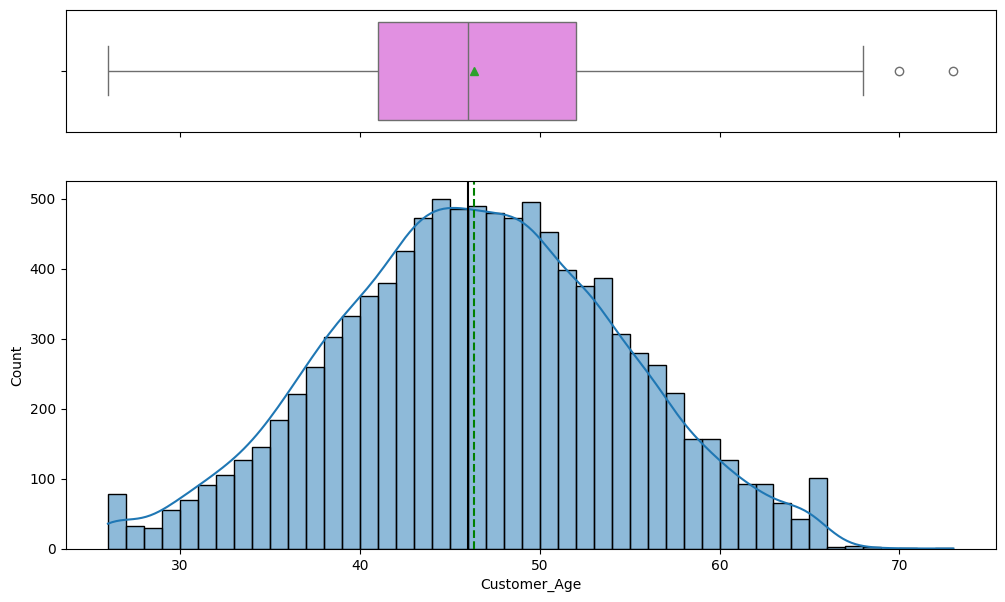

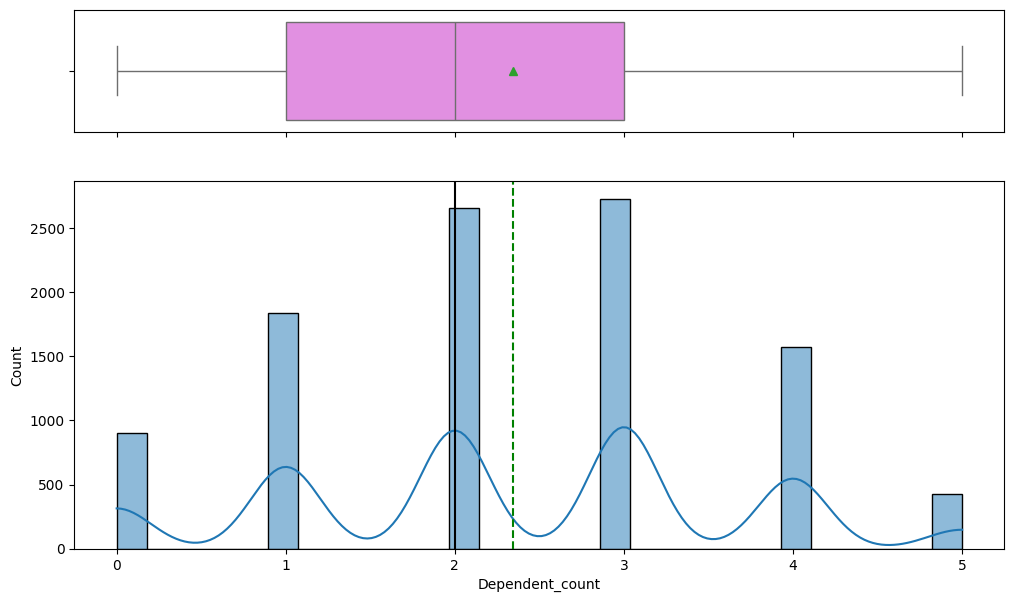

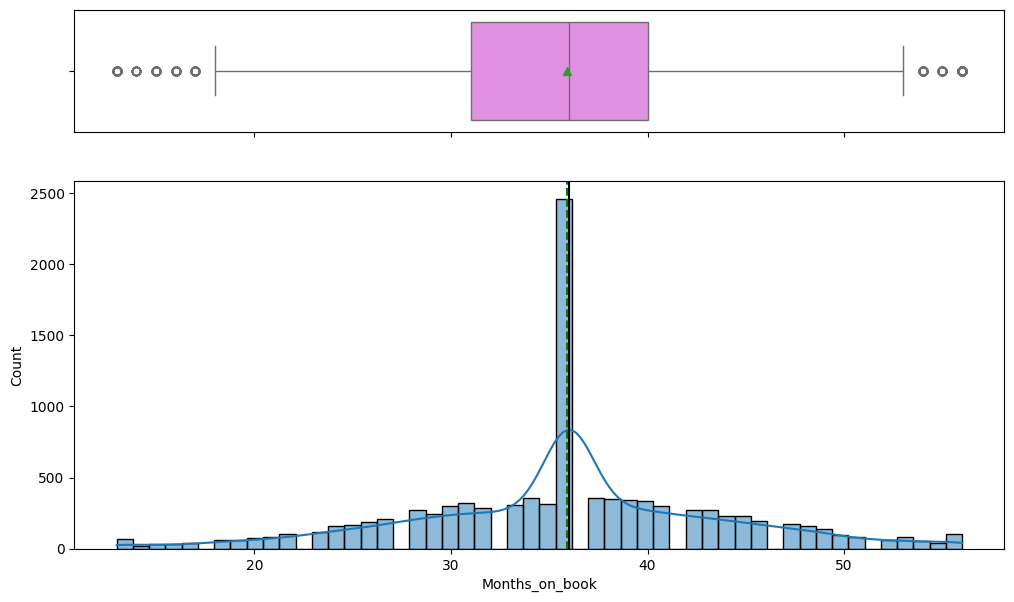

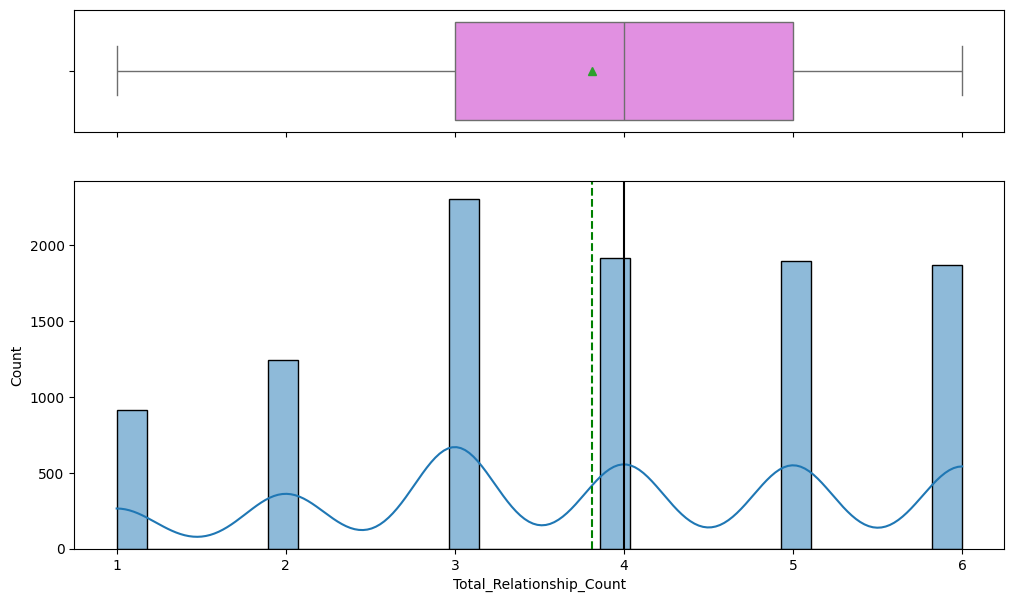

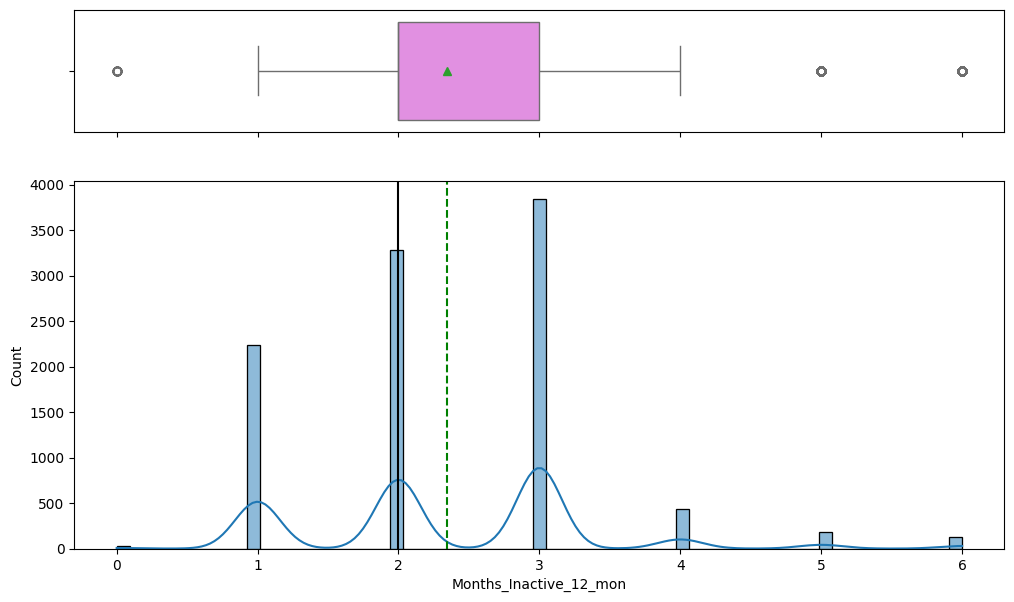

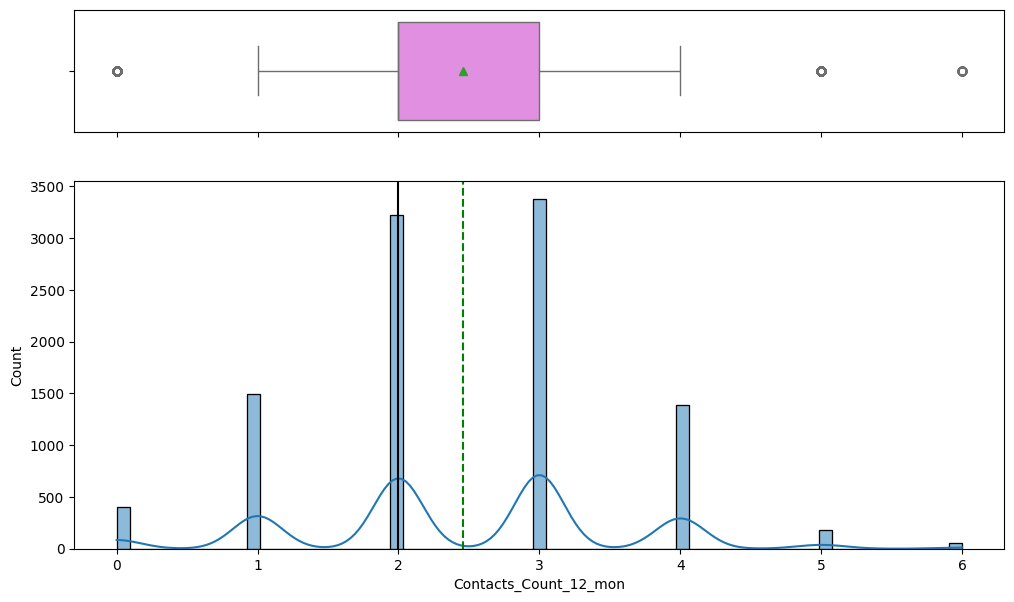

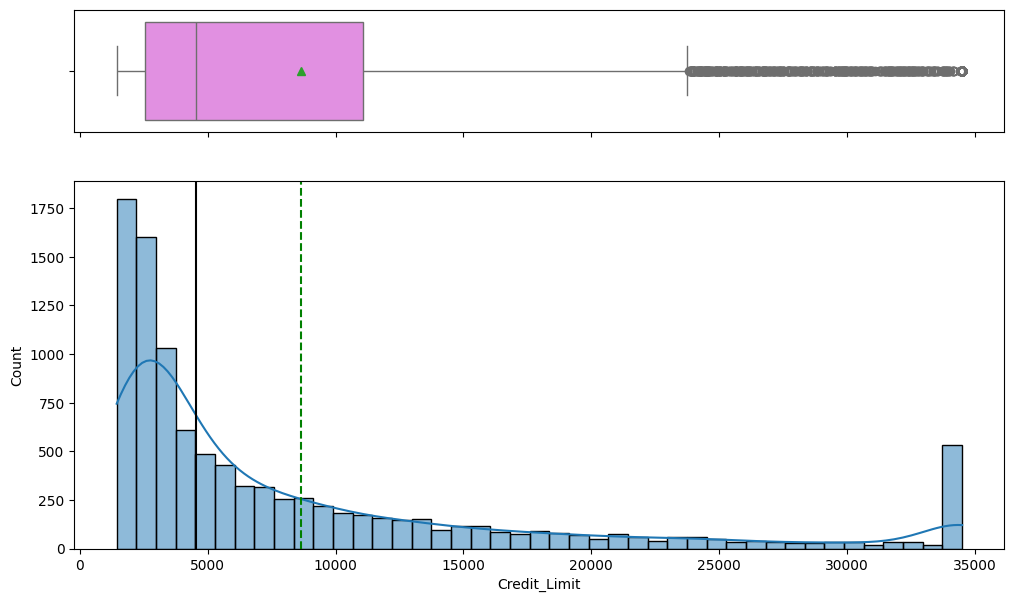

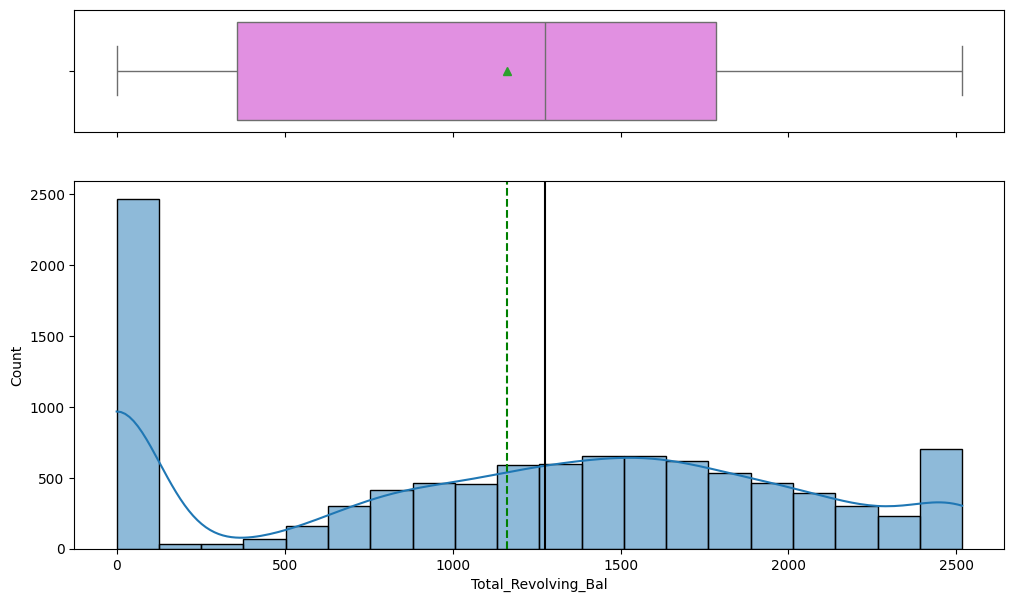

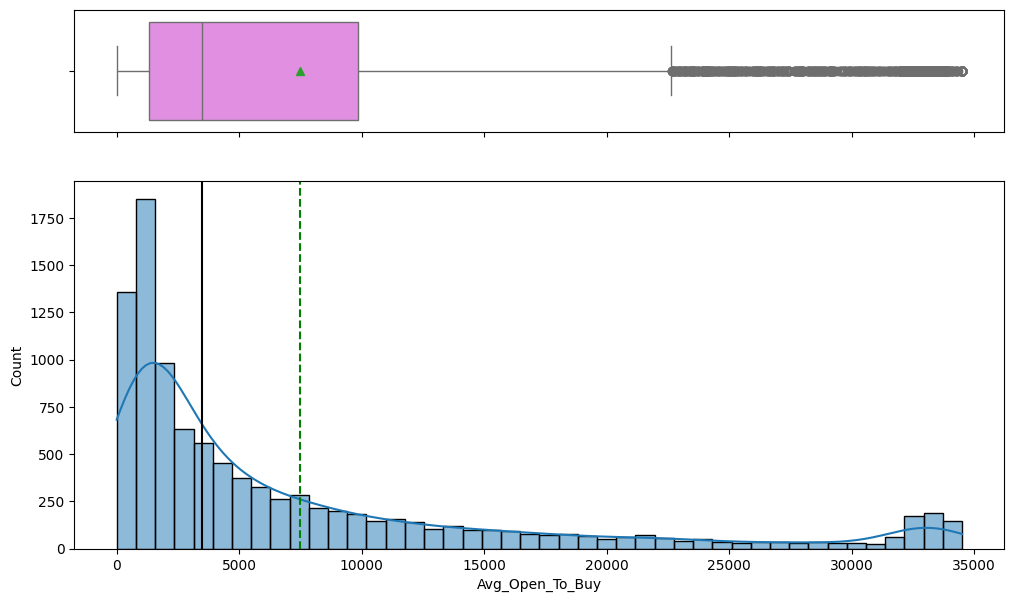

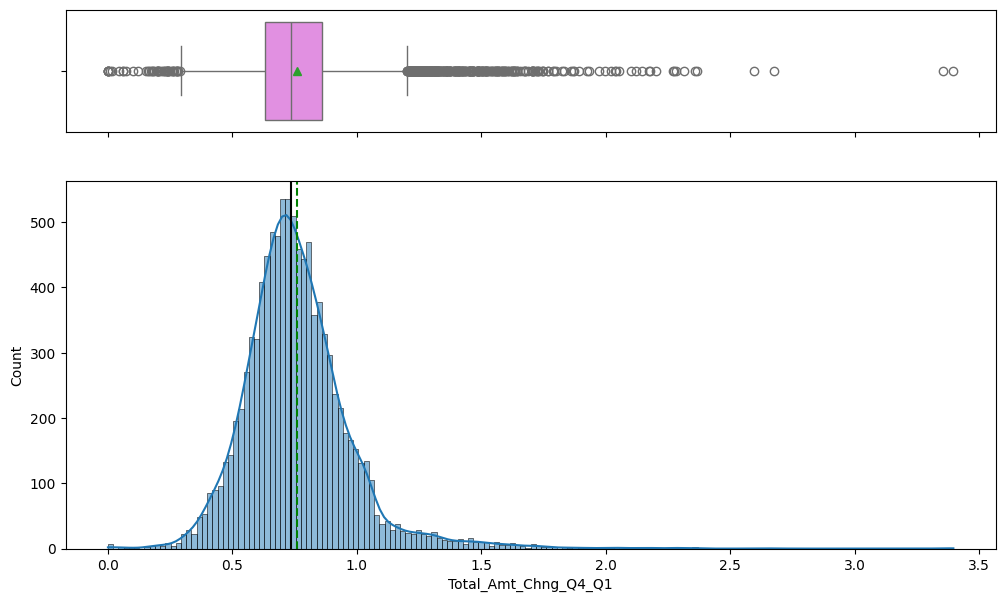

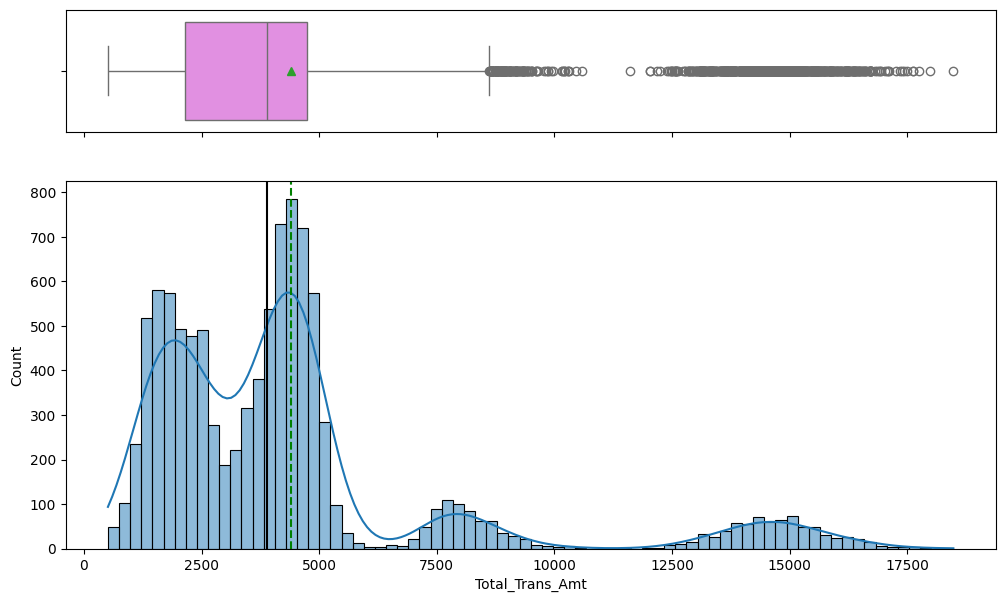

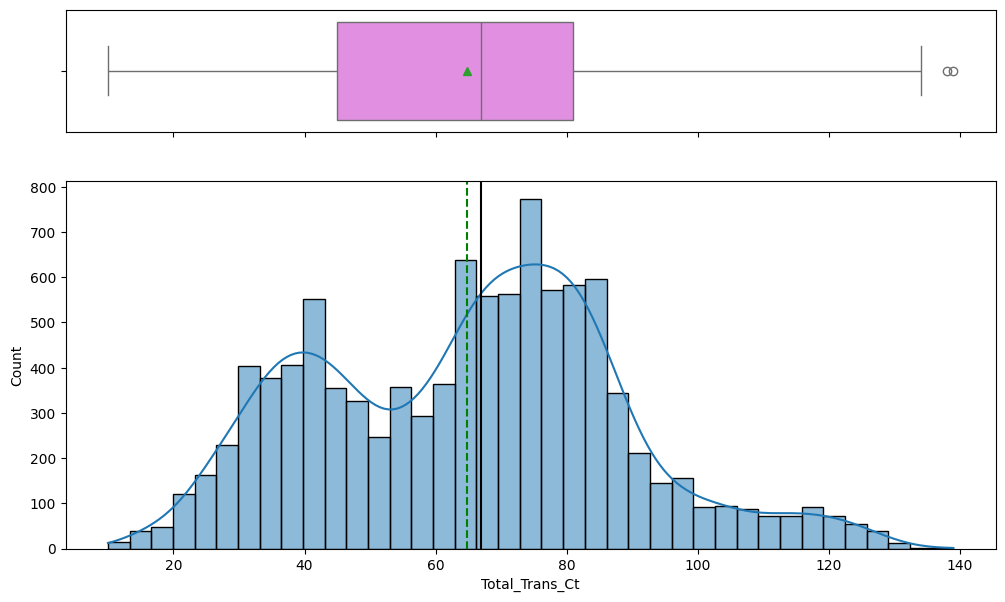

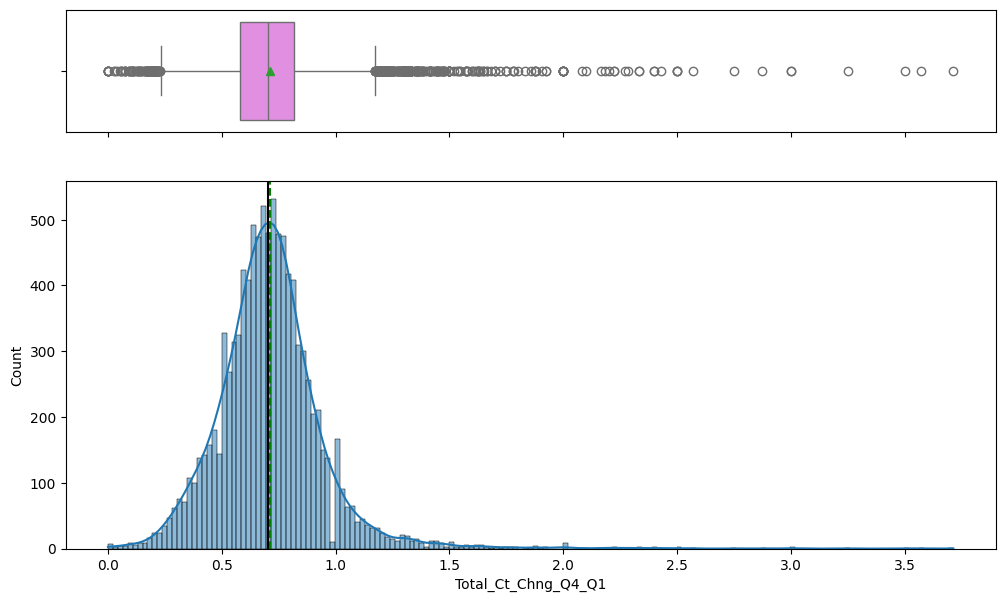

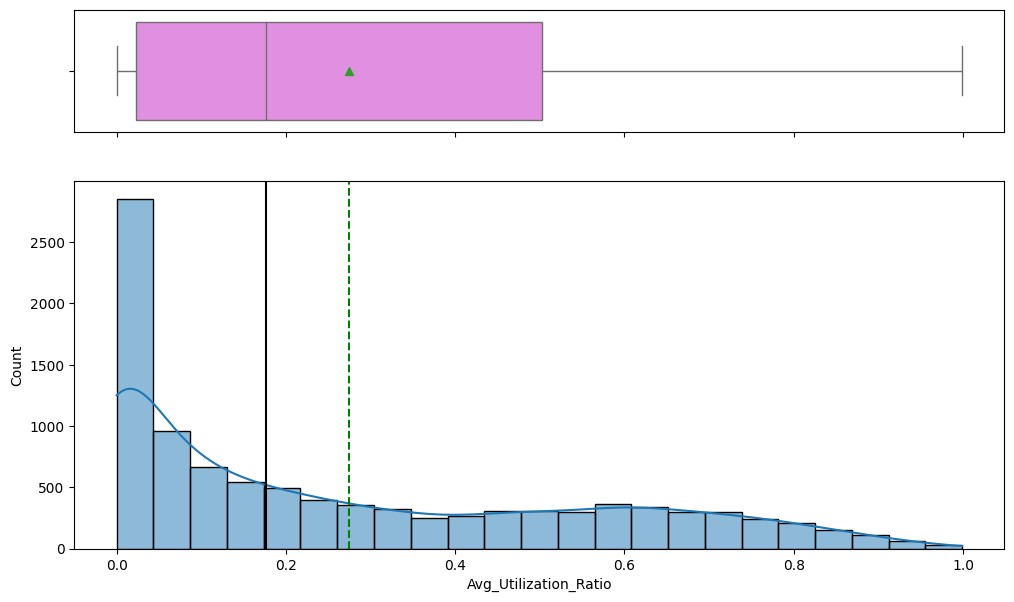

In [22]:
for col in numerical_columns:
   histogram_boxplot(df, col, kde=True)

### Analysis summary on numerical columns
* Total revolving balance ranges from few hundreds to 2500s.
* Avg_open_to_but is higly right skewed with so many outliers starting from $$24K.
* Total amount change from Q1 to Q4 is also symmetric with many outliers.
* Total transaction amount in last 12 months has 2 peaks at $2300 and $4400 with 450 and 800 counts.
* Total transaction count has 2 peaks at 40 and 70 with 500 and 800 counts approximately.
* Mean and median ratio of transaction count change from q1 to q4 is at 0.7, which forms a symmetrical distribution with many outliers
* Avg Utilization ratio has about 27% with the median at 18% and has some right skew.


### Univariate analysis for categorical columns

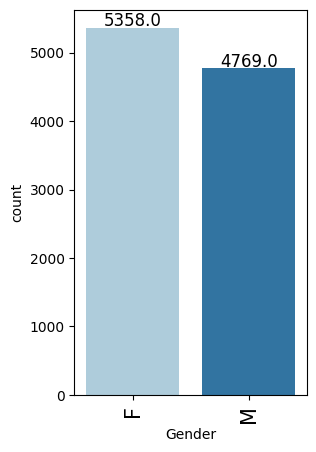

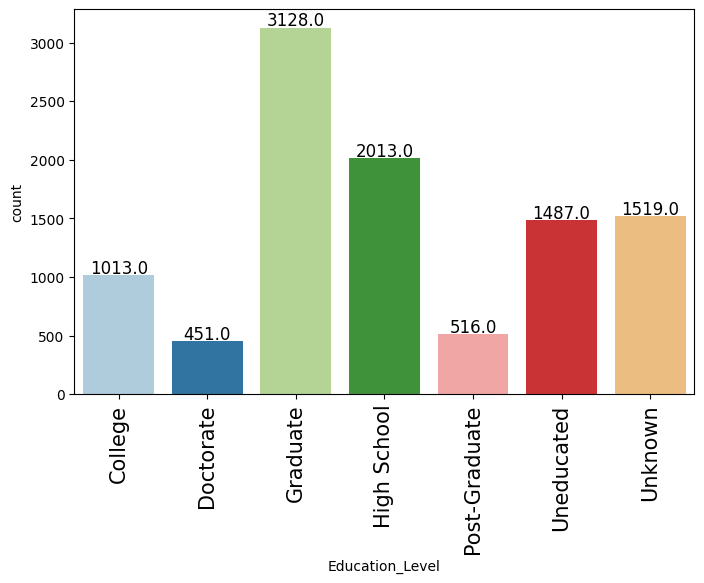

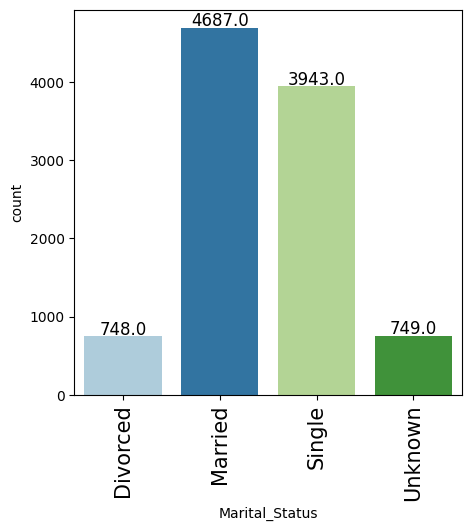

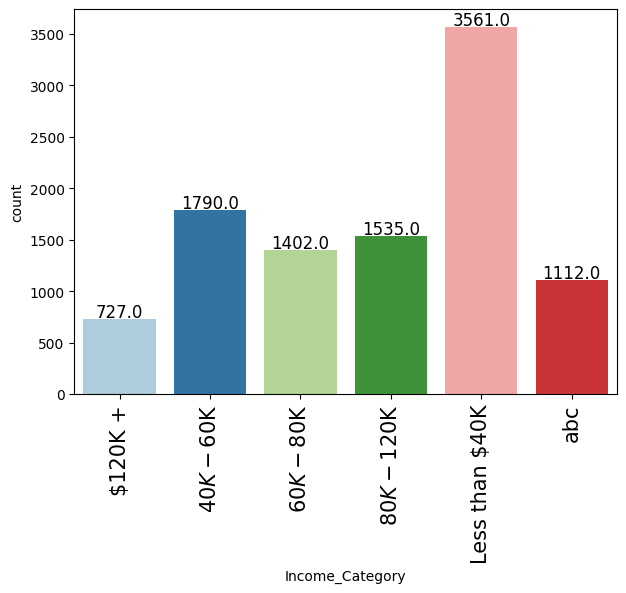

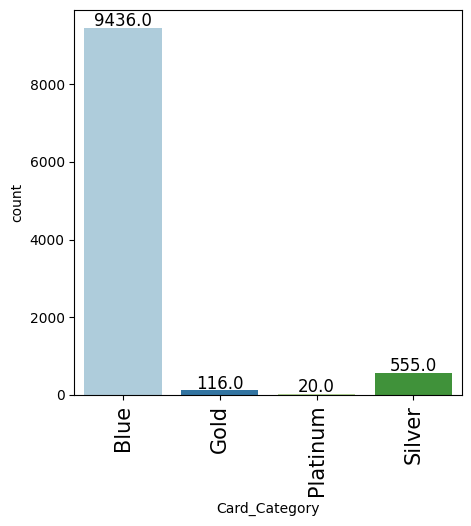

In [23]:
for col in categorical_columns:
    labeled_barplot(df, col, 'Attrition_Flag')

### Analysis on the categorical columns:
* Female customers are slightly larger than the males.
* People who are graduated are more in the dataset.
* Married customers are more followed by single and then by divorced or unknowns.
* People with income less than $40K are higher in the dataset.
* Customers with Blue card comprise of 93% followed by other types.

### Bivariate analysis
> Since our target is the categorical column attrition_flag, **categorical boxplot** can be used to identify the relationship between this column and other numerical columns. **Stacked barchart** can be used to find the relationships between this column and the categorical columns.






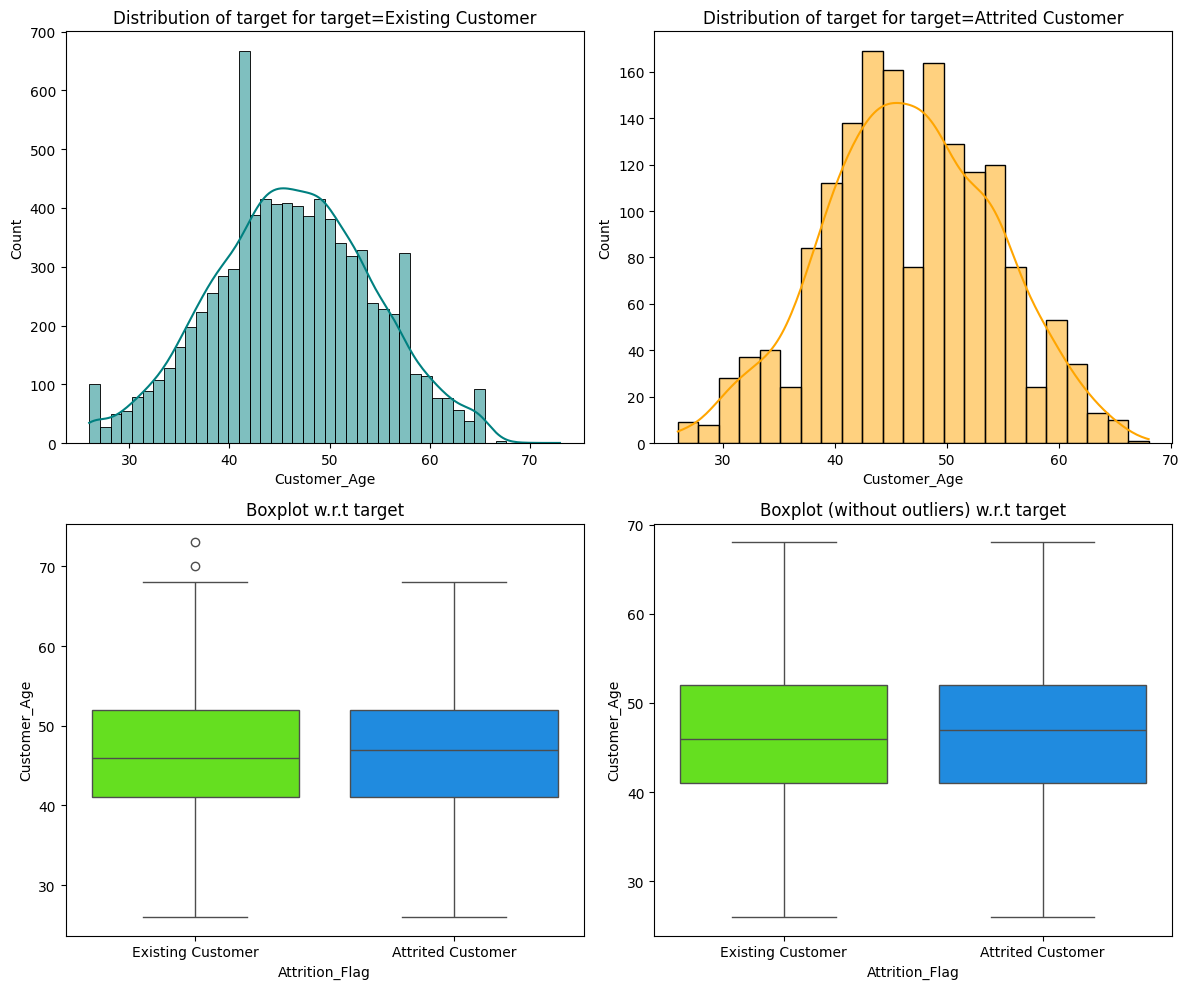

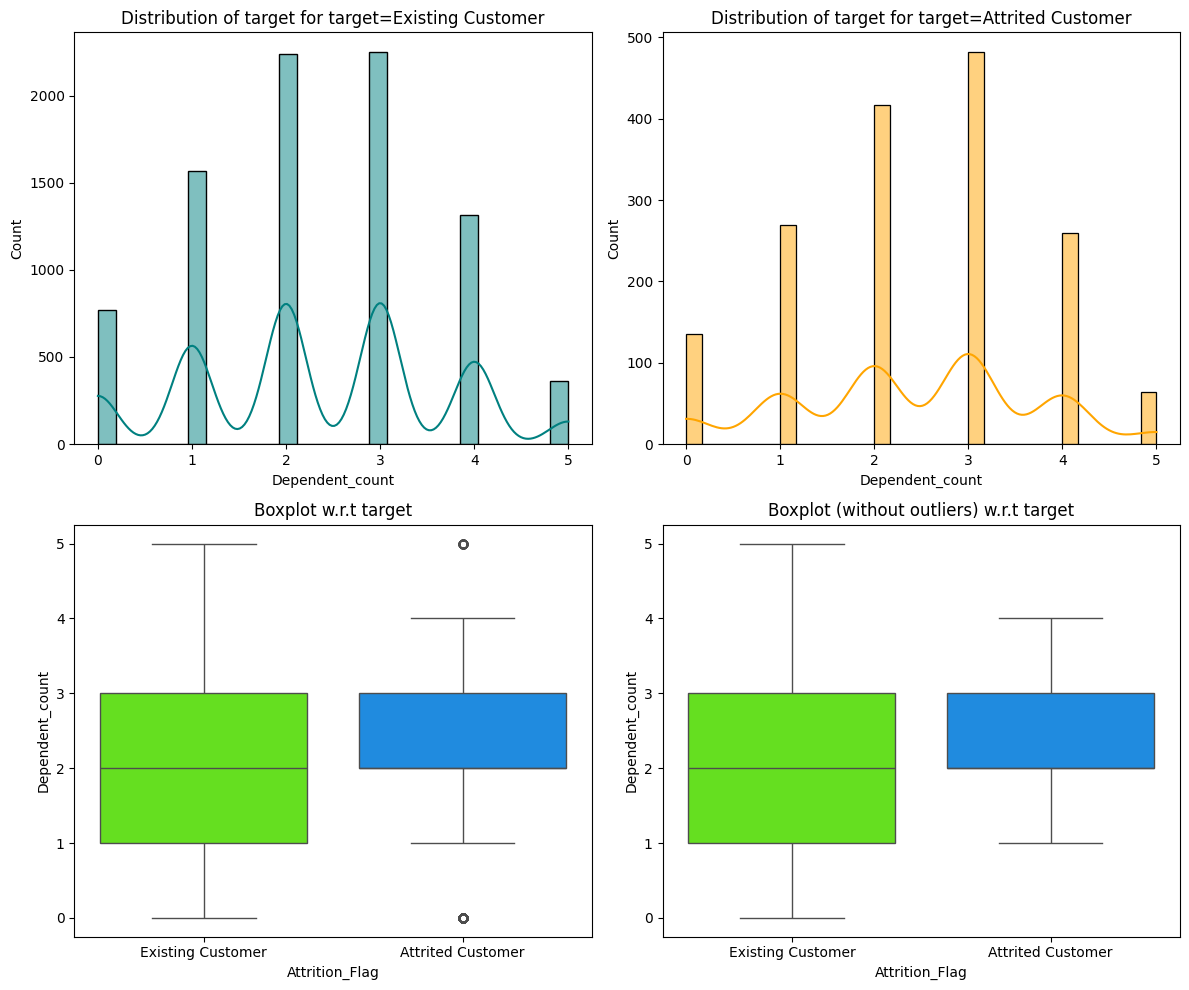

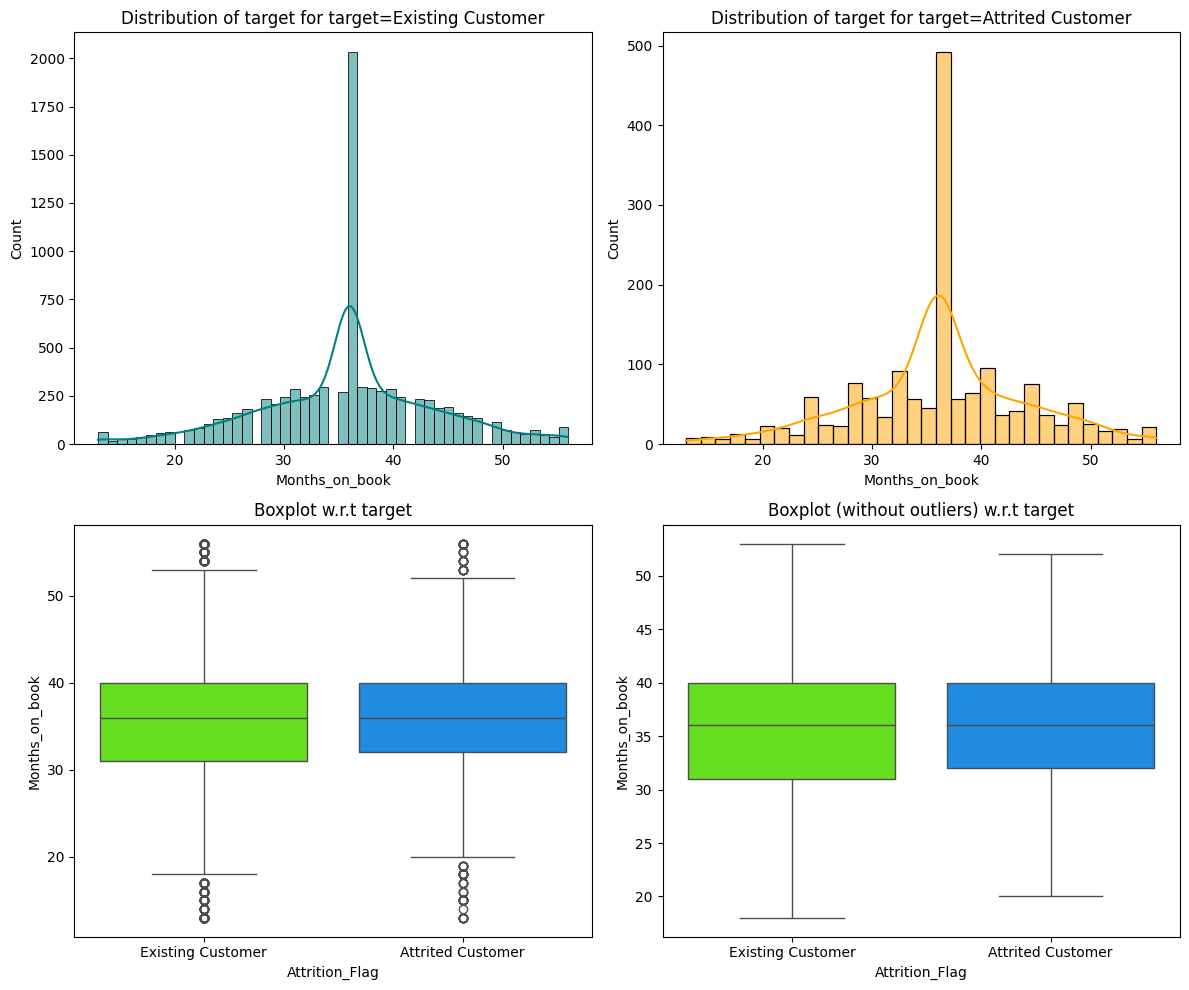

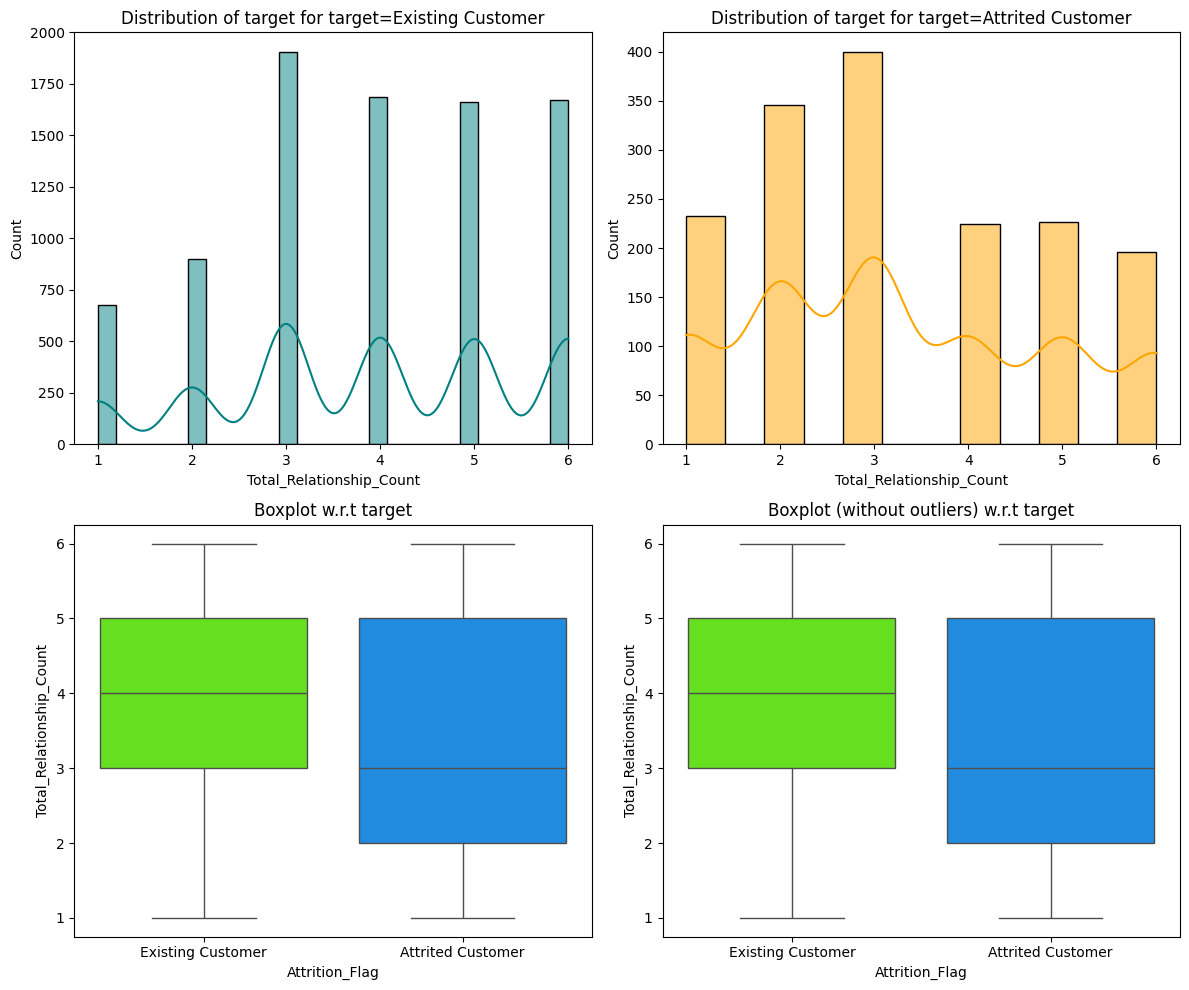

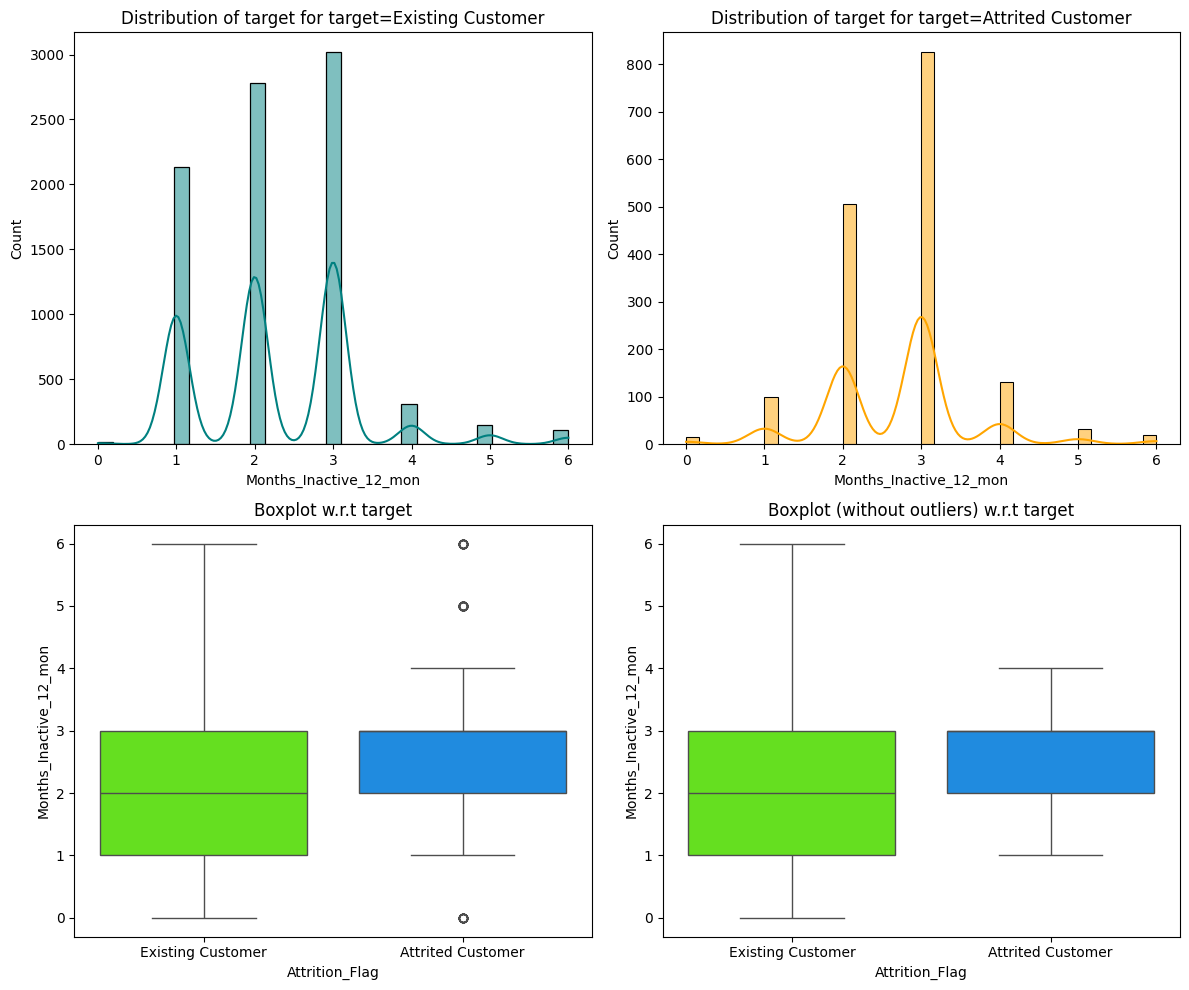

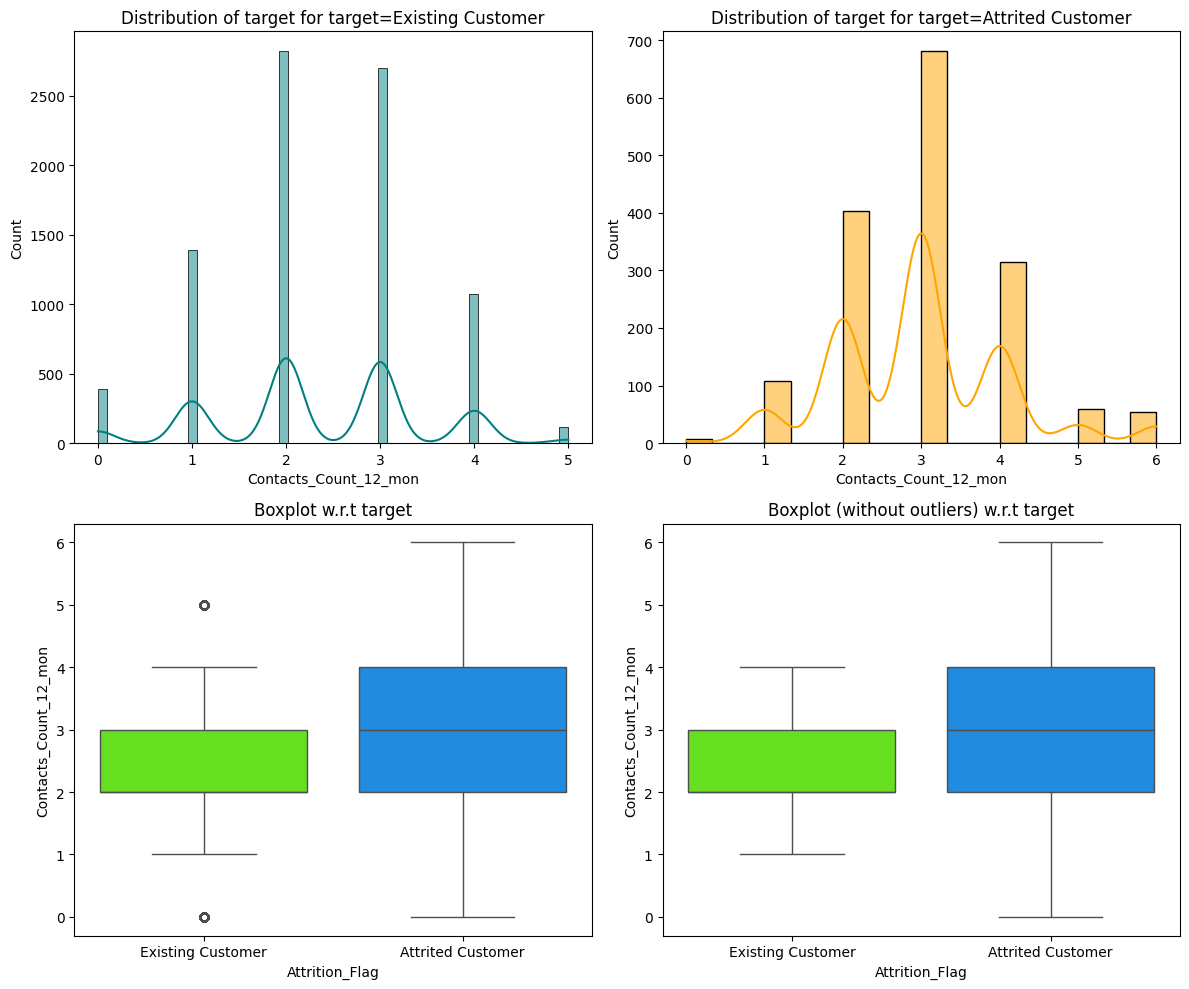

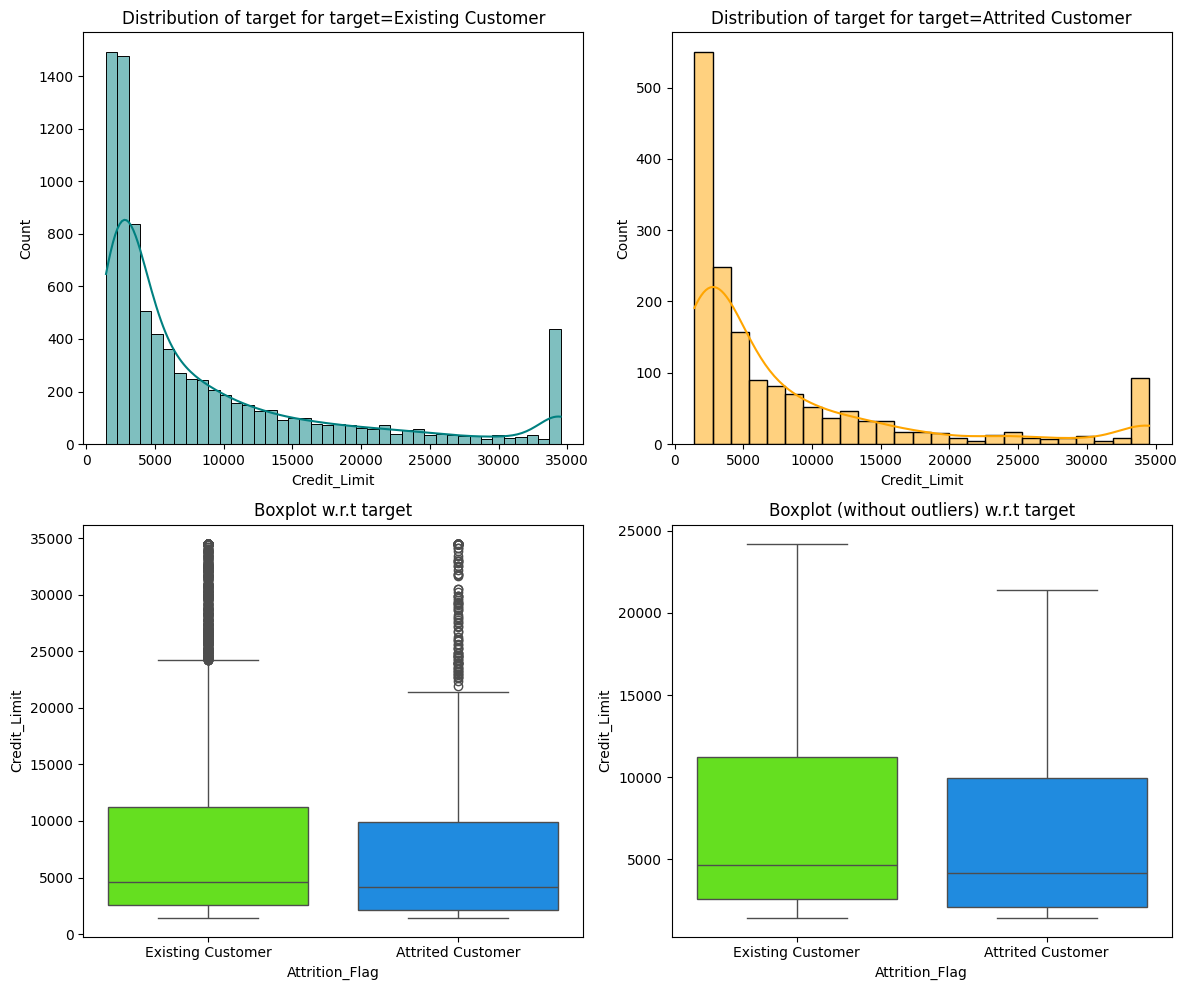

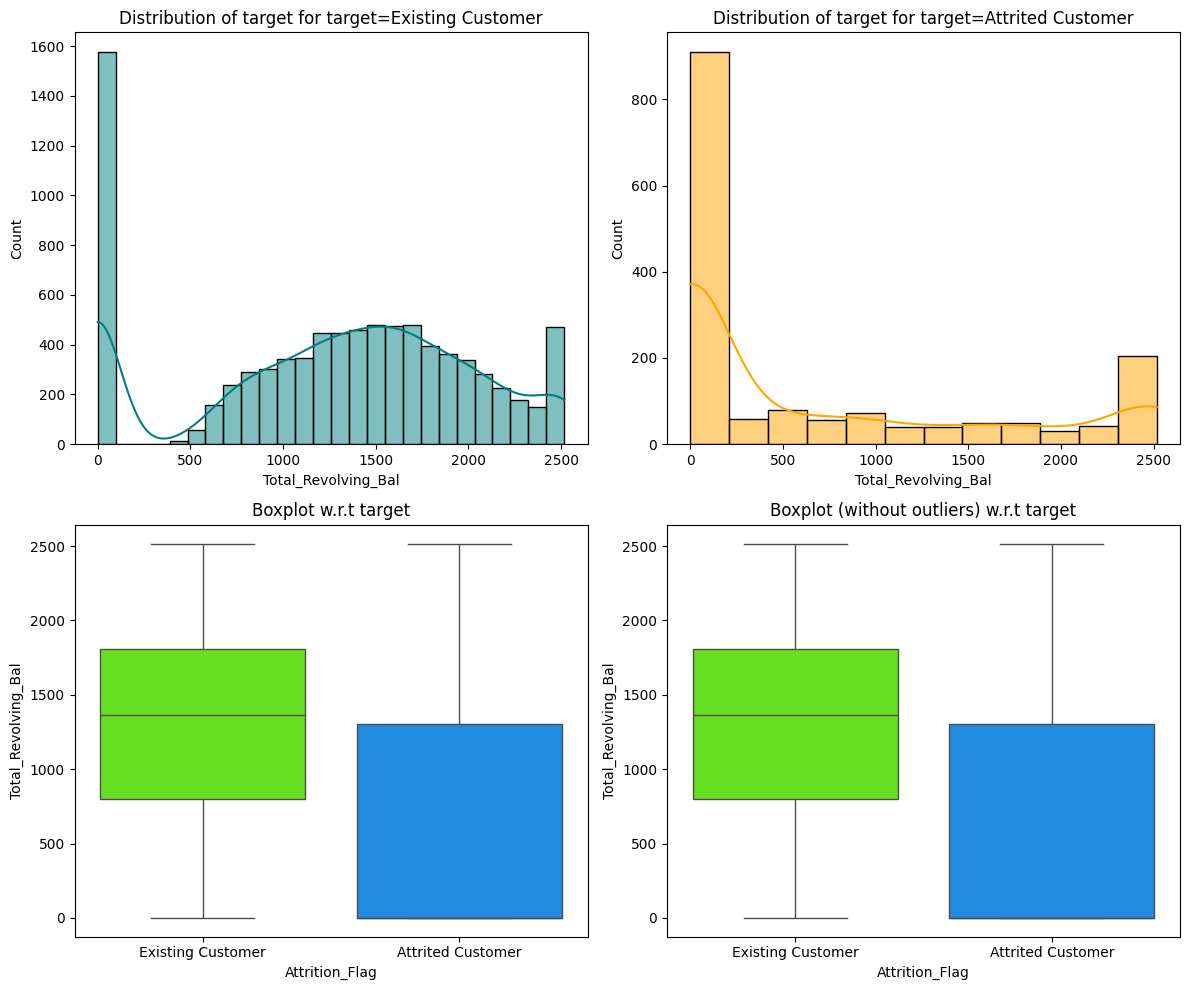

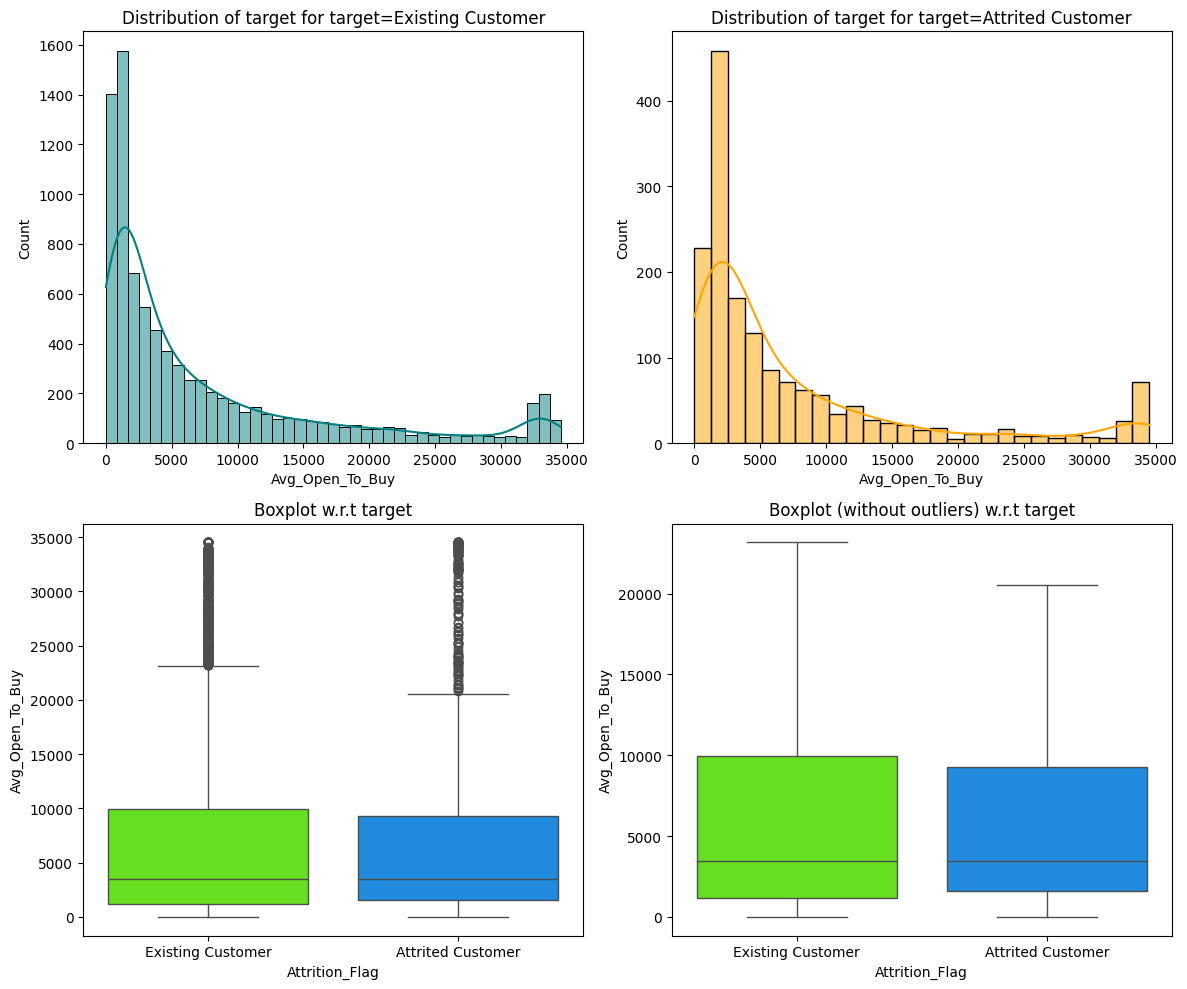

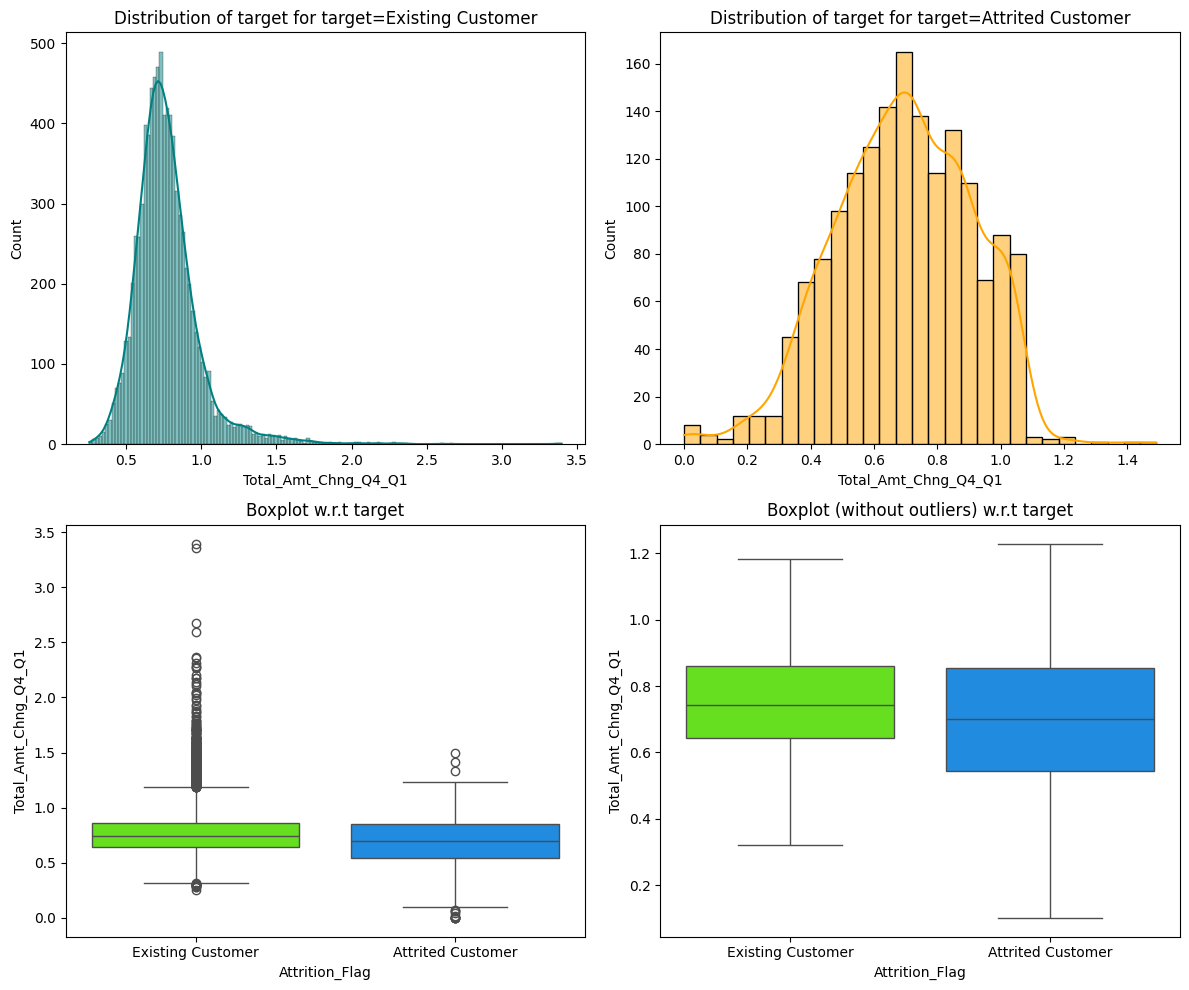

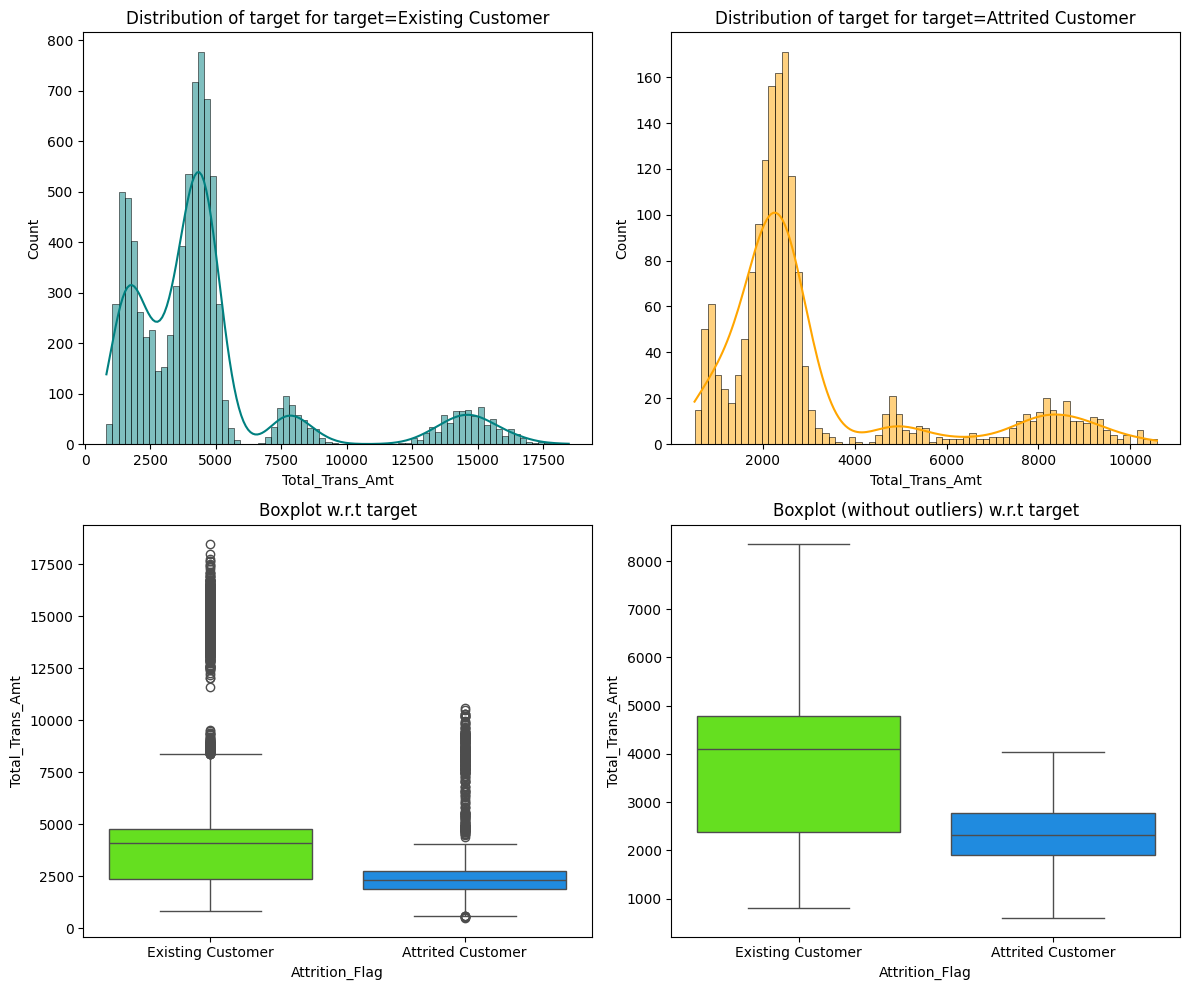

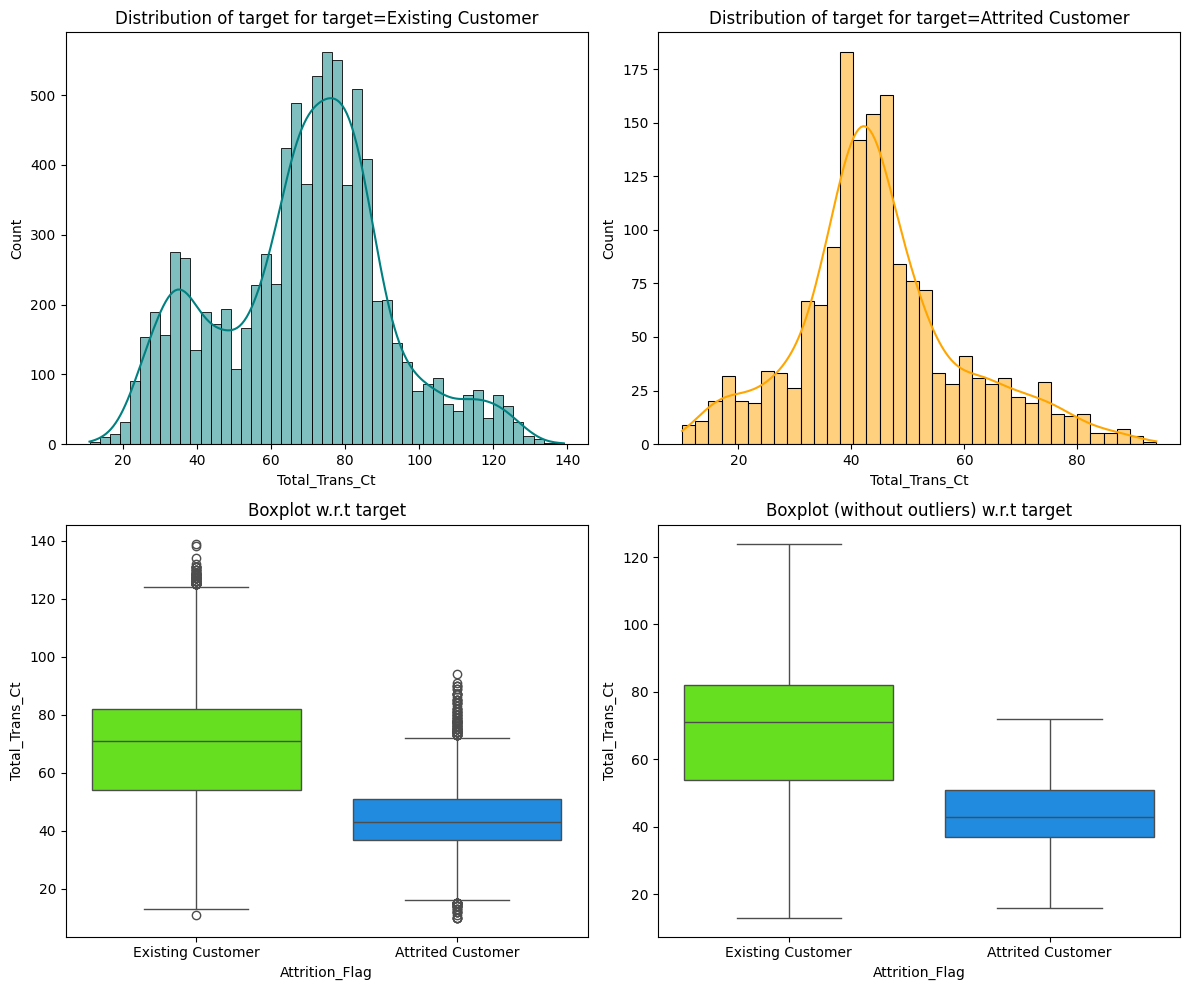

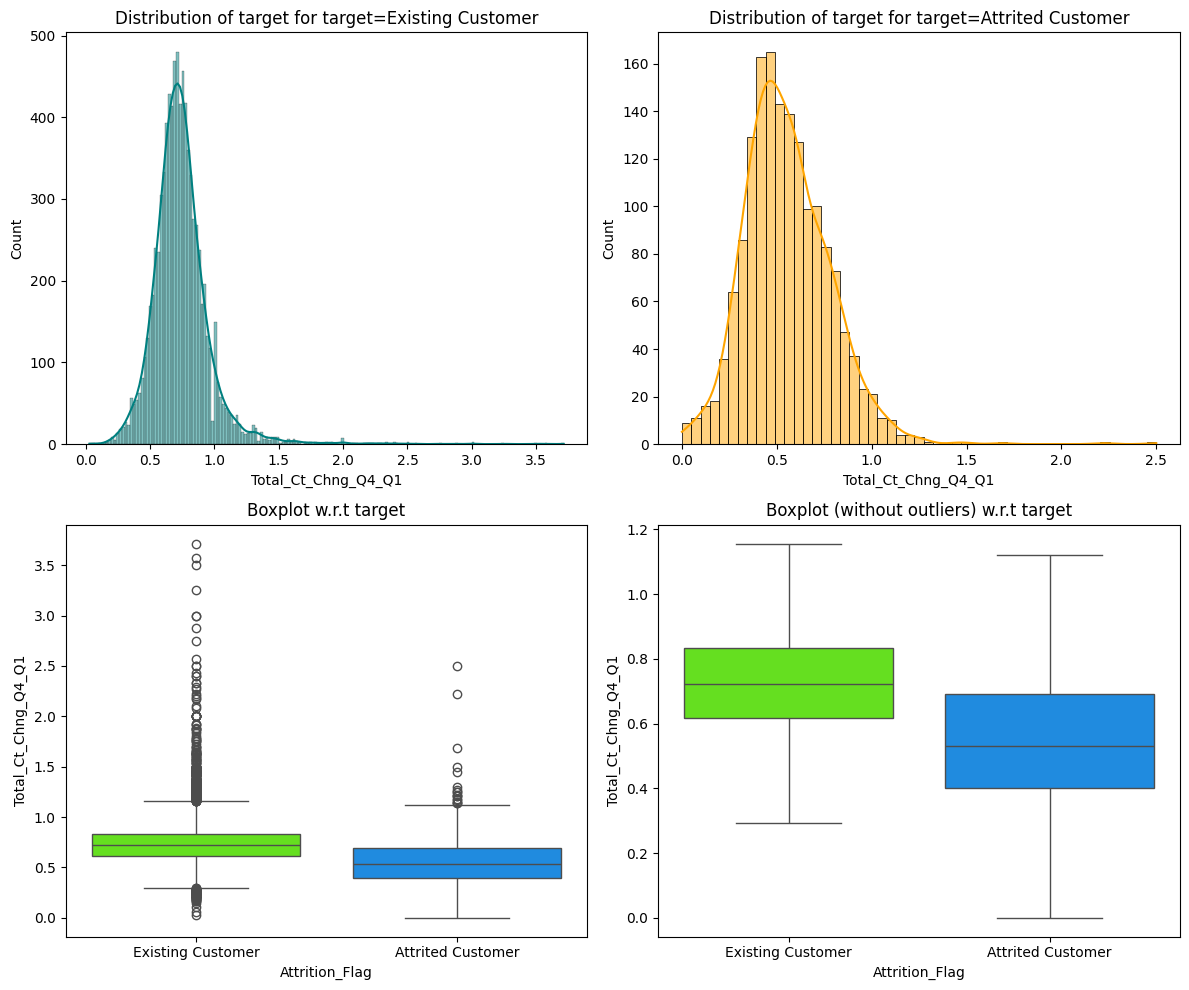

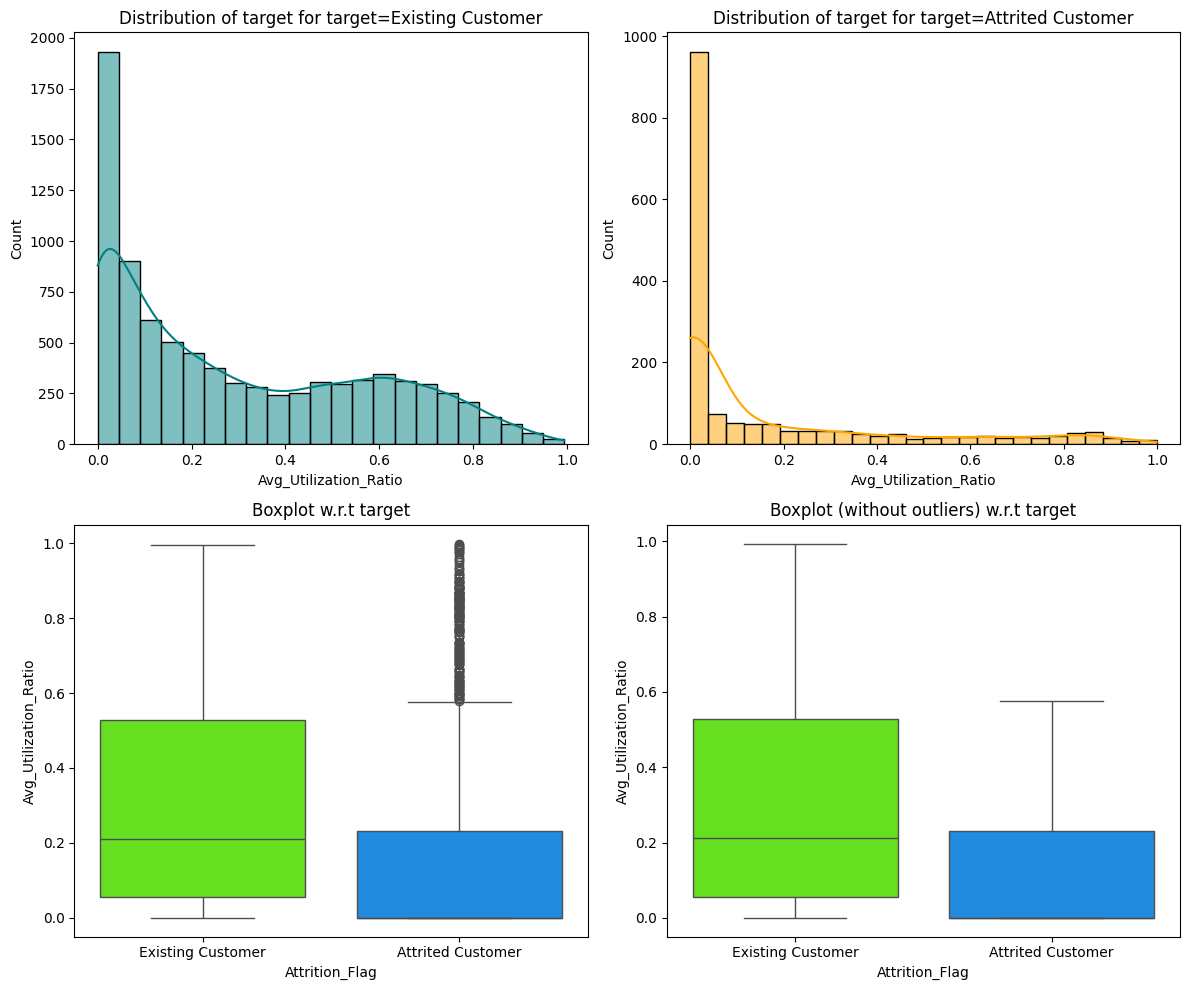

In [24]:
for col in numerical_columns:
    distribution_plot_wrt_target(df, col, 'Attrition_Flag')

### Bivariate Analysis Summary on Numerical columns
* Age has no significant impact on target
* Dependent count on attrited customers IQR range between 2 and 3. Existing ranges from 1 to 6
* Total rel count is higher for attrited customers, less for existing customers
* Attrited customers are less inactive in the last 12 months period.
* Even the total revolving balance for attrited customers is less compared to the existing customers.
* Existing customers have more total transaction amounts and counts comparatively.
* Ratio of total transaction count from q1 to q4 is lower for attrited customers.
* Attrited customers spending the credits is way lesser than the existing customers spending.

### Bivariate analysis on categorical columns

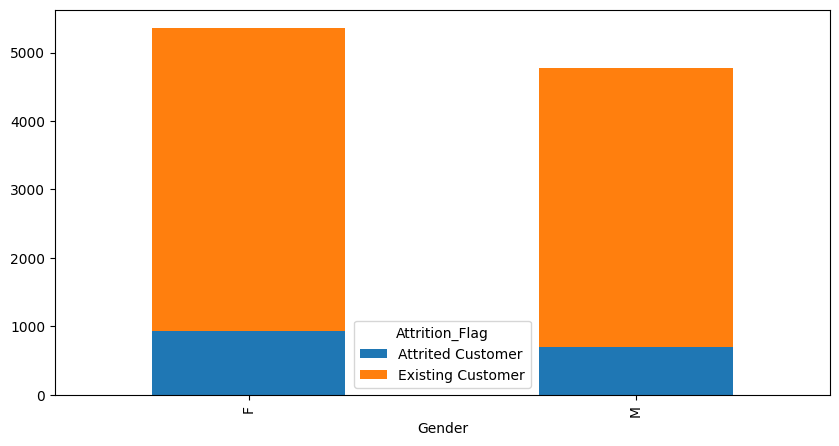

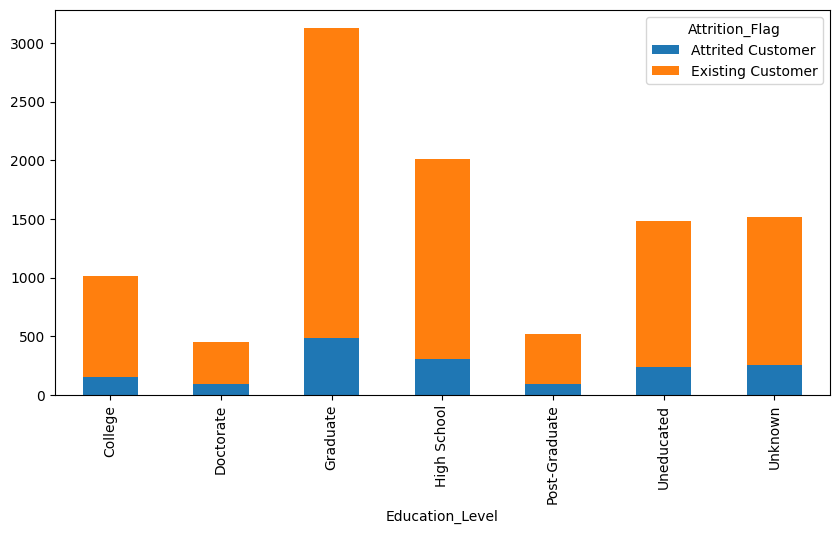

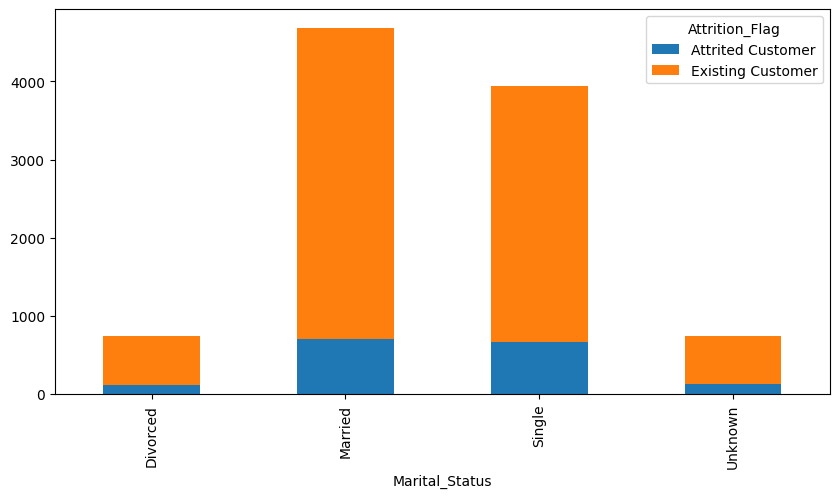

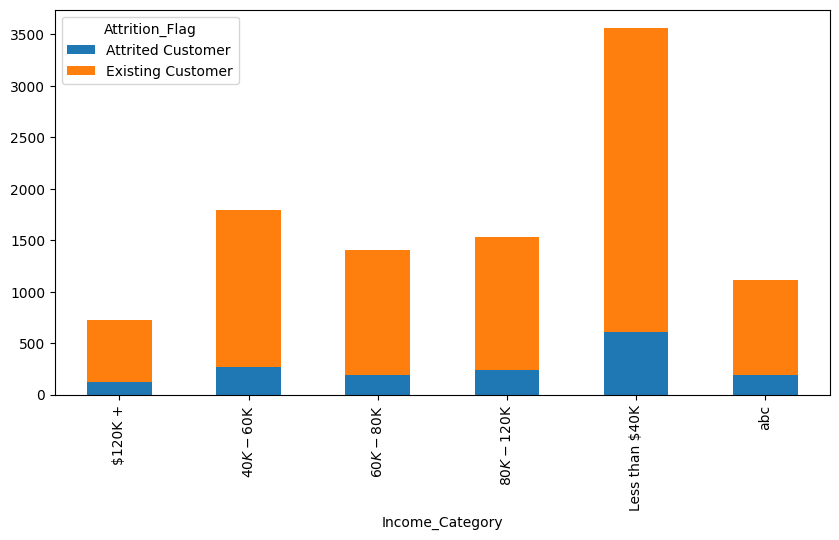

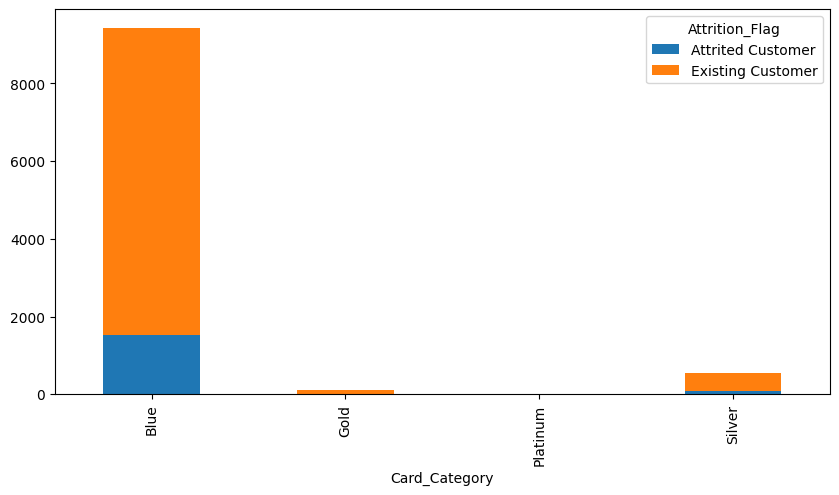

In [25]:
for col in categorical_columns:
    pd.crosstab(df[col], df['Attrition_Flag']).plot(kind='bar', stacked=True, figsize=(10,5))
    plt.show()

### Bivariate analysis summary on categorical columns
* Females are more for both existing  and attrited customers
* Graduates are more for both existing  and attrited customers
* Married people are most likely to attrite.
* Income less than $40K are more to stay
* Blue card holders are most likely to stay.

### Question 1: How is the total transaction amount distributed?

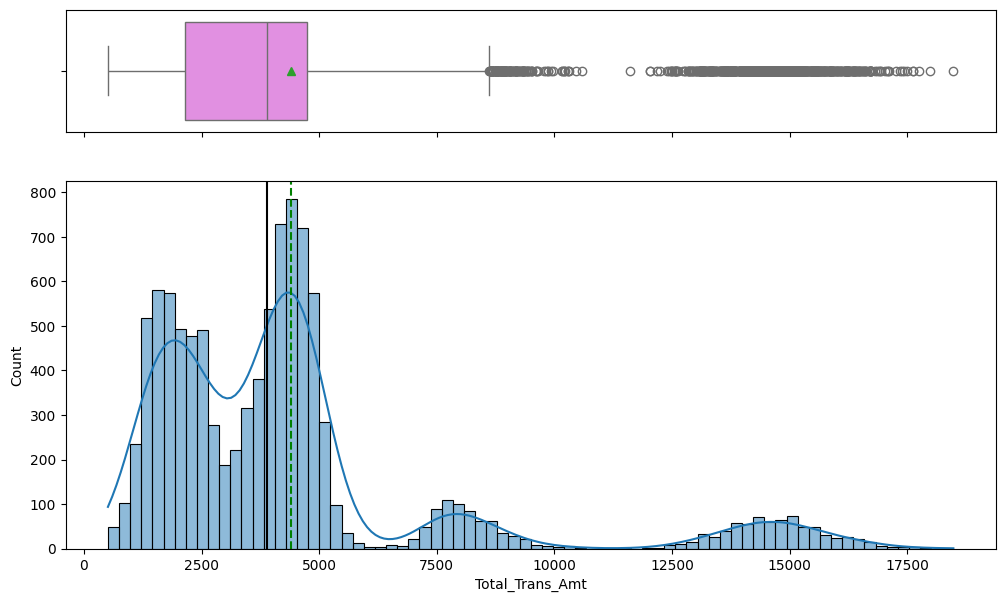

In [26]:
histogram_boxplot(df, 'Total_Trans_Amt', kde=True)

### Total transaction amount varies from few 100s to 18,000s. It has multiple peaks with the highest around 4,800 with alomost 750 customers
* The mean triangle at the box plot is near 4500 which is above median line and indicates right skew.
* It has lots of outliers above 8500

### Question 2: What is the distribution of the level of education of customers?

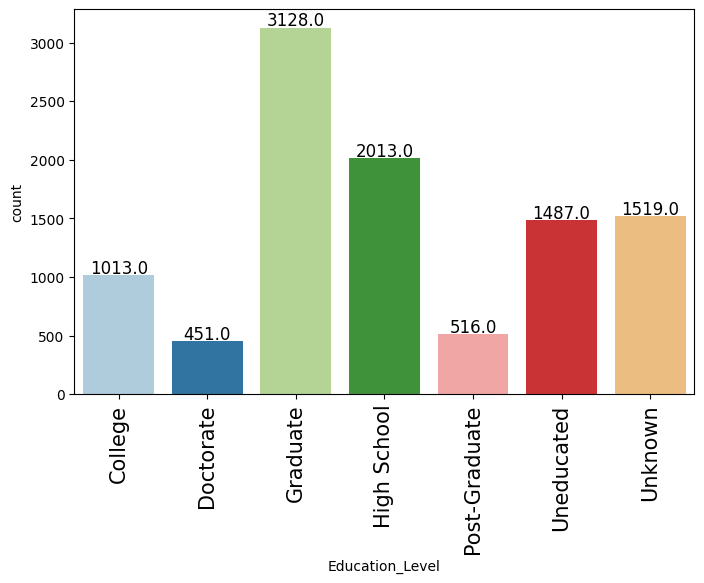

In [27]:
labeled_barplot(df, 'Education_Level', 'Attrition_Flag')

### Question 3: What is the distribution of the level of income of customers?

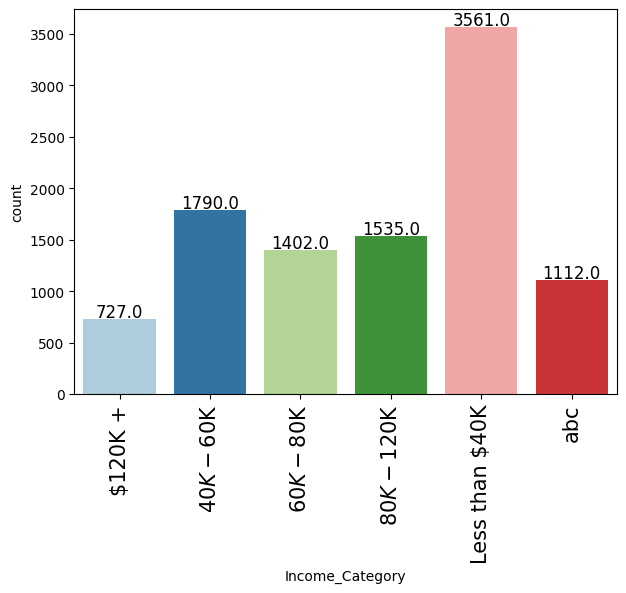

In [28]:
labeled_barplot(df, 'Income_Category')

### Question 4: How does the change in transaction amount between Q4 and Q1 (total_ct_change_Q4_Q1) vary by the customer's account status (Attrition_Flag)?

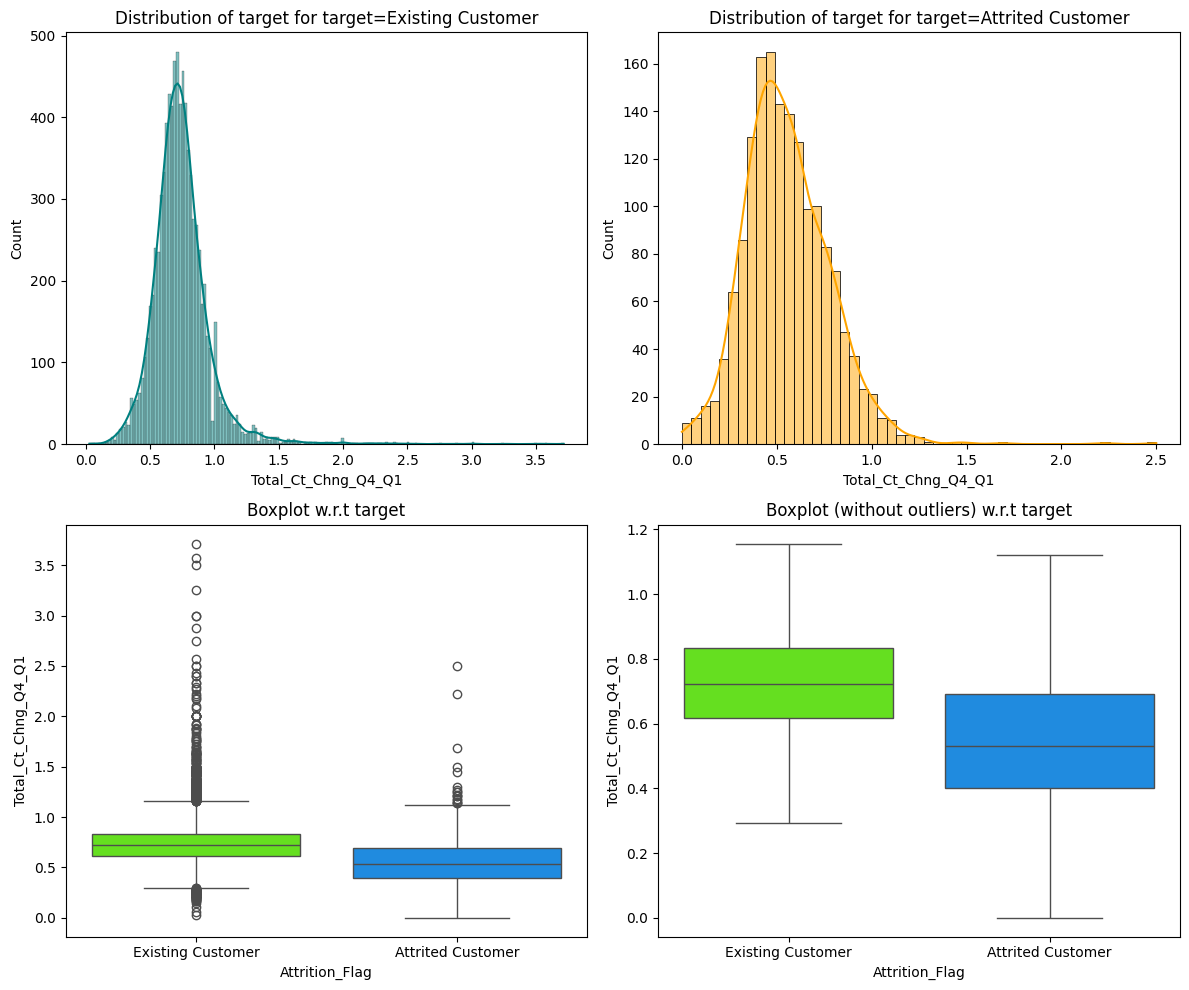

In [29]:
distribution_plot_wrt_target(df, 'Total_Ct_Chng_Q4_Q1', 'Attrition_Flag')

* The ratio of total transactions count from q4 to q1 is higher for existing customers with the median at 0.75 while for attrited customers it is at 0.5.


### Question 5: How does the number of months a customer was inactive in the last 12 months (Months_Inactive_12_mon) vary by the customer's account status (Attrition_Flag)?

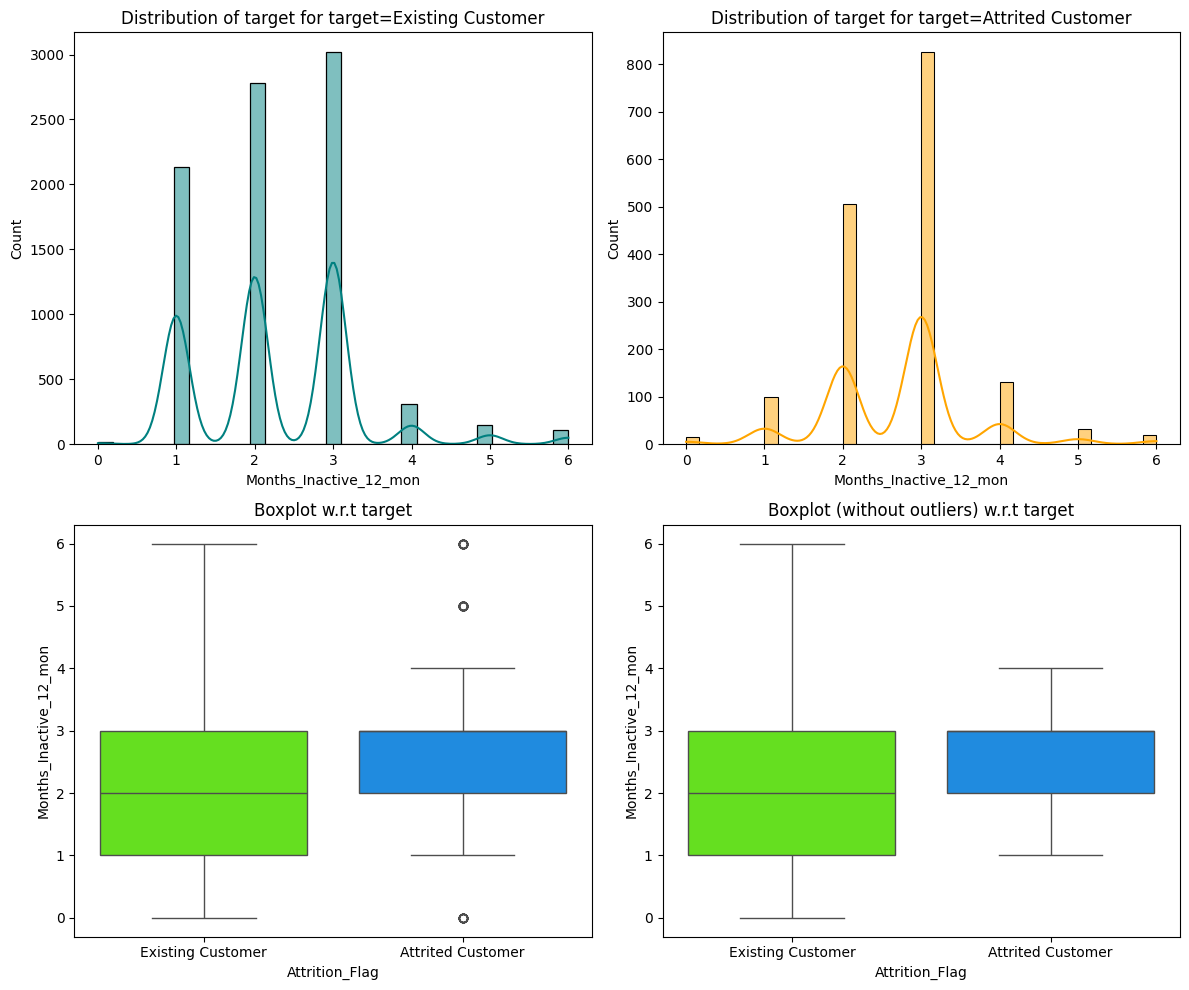

In [30]:
distribution_plot_wrt_target(df, 'Months_Inactive_12_mon', 'Attrition_Flag')

* Existing customers are more inactive than attrited customers

### Question 6: What are the attributes that have a strong correlation with each other?

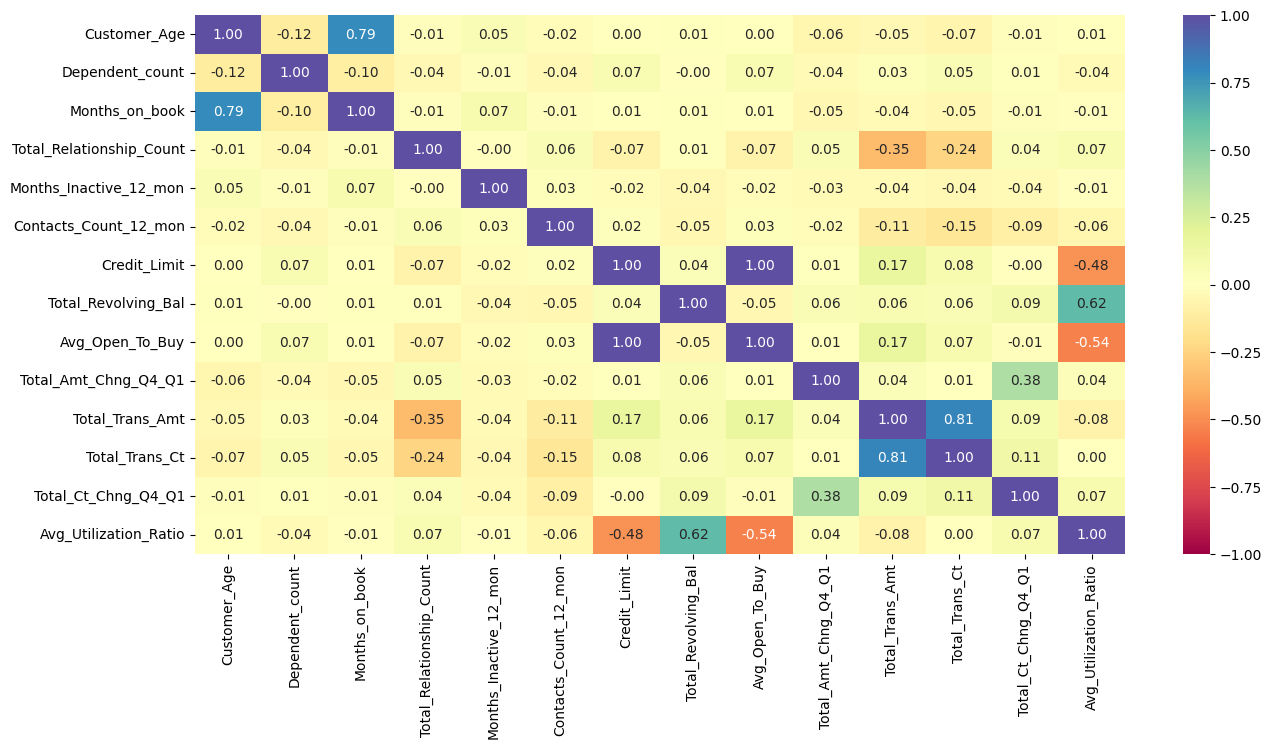

In [31]:
# Correlation plot
plt.figure(figsize=(15, 7))
sns.heatmap(df[numerical_columns].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* From the above heat map we could find there are positive and negative correlations among certain variables. There is positive correlation among features like age vs month on book, credit limit vs Avg open to buy, total transaction count vs total transaction amount, revolving balance vs avg utilization ratio.
* negative correlation for avg open to buy vs avg utilization ratio, credit limit vs avg utilization ratio, total transaction amount vs total relationship count.

## Data Pre-processing

### Data preparation for Modeling

In [32]:
# Split the dataset into 3 sets train, test, validation sets
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag'].apply(lambda x: 1 if x == "Attrited Customer" else 0)

In [33]:
# Lets first split to temp and test and then split the temp to train and validation sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp)

In [34]:
# Lets print the shape
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)

Shape of X_train:  (6075, 19)
Shape of y_train:  (6075,)


## Missing value imputation




* The columns that had missing values are Education_Level and Marital_Status and they are replaced with Unknown category.

### Creating Dummy variables

In [35]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [36]:
X_train.shape, X_val.shape, X_test.shape

((6075, 32), (2026, 32), (2026, 32))

In [37]:
X_train.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_abc,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
800,40,2,21,6,4,3,20056.000000,1602,18454.000000,0.466000,...,True,False,False,False,False,False,False,False,False,False
498,44,1,34,6,2,0,2885.000000,1895,990.000000,0.387000,...,False,False,False,False,False,False,True,False,False,False
4356,48,4,36,5,1,2,6798.000000,2517,4281.000000,0.873000,...,False,False,False,False,True,False,False,False,False,False
407,41,2,36,6,2,0,27000.000000,0,27000.000000,0.610000,...,False,True,False,True,False,False,False,False,False,True
8728,46,4,36,2,2,3,15034.000000,1356,13678.000000,0.754000,...,False,False,True,False,False,False,False,False,False,True


In [38]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6075 entries, 800 to 4035
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    6075 non-null   int64  
 1   Dependent_count                 6075 non-null   int64  
 2   Months_on_book                  6075 non-null   int64  
 3   Total_Relationship_Count        6075 non-null   int64  
 4   Months_Inactive_12_mon          6075 non-null   int64  
 5   Contacts_Count_12_mon           6075 non-null   int64  
 6   Credit_Limit                    6075 non-null   float64
 7   Total_Revolving_Bal             6075 non-null   int64  
 8   Avg_Open_To_Buy                 6075 non-null   float64
 9   Total_Amt_Chng_Q4_Q1            6075 non-null   float64
 10  Total_Trans_Amt                 6075 non-null   int64  
 11  Total_Trans_Ct                  6075 non-null   int64  
 12  Total_Ct_Chng_Q4_Q1             6075 

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are the values model predicts customers will attrite.
- False negatives (FN) are the values that the model predicts customers will stay with the bank but in real world they attrite.
- Our goal is to find all the true positives and reduce false negatives where the model correctly predicts the customer attrite or not. So overall the recall score needs to be improved.
- Recall is the number of TP model predicts to the actual postives ( TP + FN).
TP / (TP + FN)

**Which metric to optimize?**


* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that the customer will not attrite it incurs loss for the bank.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [39]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [40]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building with original data

Sample code for model building with original data

In [41]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Decision tree", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("GradientBoost", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Decision tree: 1.0
Bagging: 0.9846311475409836
Random forest: 1.0
AdaBoost: 0.8381147540983607
GradientBoost: 0.8780737704918032
XGBoost: 1.0

Validation Performance:

Decision tree: 0.7975460122699386
Bagging: 0.7975460122699386
Random forest: 0.7944785276073619
AdaBoost: 0.8588957055214724
GradientBoost: 0.8588957055214724
XGBoost: 0.8895705521472392


### The Boosting models perform well with the train and validation sets. Out of all XGBoost has the highest recall score of 89% on validation dataset.

### Model Building with Oversampled data


In [42]:
# Synthetic Minority Over Sampling Technique
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {}".format(sum(y_train_over == 0)))

Before Oversampling, counts of label 'Yes': 976
Before Oversampling, counts of label 'No': 5099 

After Oversampling, counts of label 'Yes': 5099
After Oversampling, counts of label 'No': 5099


In [43]:
print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

After Oversampling, the shape of train_X: (10198, 32)
After Oversampling, the shape of train_y: (10198,) 



In [44]:
print( "\n Training Performance after oversampling \n ")
models = []
models.append(("Decision tree", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("GradientBoost", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))

for name, model in models:
    model.fit(X_train_over, y_train_over)
    train_score = recall_score(y_train_over, model.predict(X_train_over))
    validation_score = recall_score(y_val, model.predict(X_val))
    print("{} Training Score: {:.4f}  Validation Score: {:.4f}  ".format(name, train_score, validation_score))




 Training Performance after oversampling 
 
Decision tree Training Score: 1.0000  Validation Score: 0.8497  
Bagging Training Score: 0.9975  Validation Score: 0.8742  
Random forest Training Score: 1.0000  Validation Score: 0.8712  
AdaBoost Training Score: 0.9614  Validation Score: 0.8865  
GradientBoost Training Score: 0.9765  Validation Score: 0.9141  
XGBoost Training Score: 1.0000  Validation Score: 0.9202  


### Recall performance for models after training with oversampled data:
* The recall score has improved overall for all the models, especially the Bagging ensemble models
* Recall on validation dataset has increased on Decision Tree by 6% , Bagging Classifier by 8% and Random Forest by 8%.
* Recall on validation dataset has increased on Adaboost by 3%, Gradient Boost by 5%, XGBoost by 4%.
* Overall XGBoost model has the highest performance score with 92%


### Model Building with Undersampled data

In [45]:
print("Before Undersampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

print("After Undersampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Undersampling, counts of label 'No': {}".format(sum(y_train_un == 0)))

print("After Undersampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Undersampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Undersampling, counts of label 'Yes': 976
Before Undersampling, counts of label 'No': 5099 

After Undersampling, counts of label 'Yes': 976
After Undersampling, counts of label 'No': 976
After Undersampling, the shape of train_X: (1952, 32)
After Undersampling, the shape of train_y: (1952,) 



In [46]:
models = []
models.append(("Decision tree", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("GradientBoost", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))

for name, model in models:
    model.fit(X_train_un, y_train_un)
    train_score = recall_score(y_train_un, model.predict(X_train_un))
    validation_score = recall_score(y_val, model.predict(X_val))
    print("{} Training Score: {:.4f}  Validation Score: {:.4f}  ".format(name, train_score, validation_score))

Decision tree Training Score: 1.0000  Validation Score: 0.8926  
Bagging Training Score: 0.9918  Validation Score: 0.9264  
Random forest Training Score: 1.0000  Validation Score: 0.9294  
AdaBoost Training Score: 0.9529  Validation Score: 0.9601  
GradientBoost Training Score: 0.9826  Validation Score: 0.9601  
XGBoost Training Score: 1.0000  Validation Score: 0.9663  


### Recall Performance for models after training with undersampled data
The scores of all the models have improved and have above 90% of recall score.
The XGBoost model still scored the top with 96% recall.

### HyperparameterTuning

#### Sample Parameter Grids

### We choose Adaboost, GradientBoost and XGBoost models for the hyper parameter tuning

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost (optional):

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

### HyperparamaterTuning AdaBoostClassifier

In [47]:
# Tuning Adaboost classifier with undersamppled data
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.05, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9477655677655678:
CPU times: user 1.92 s, sys: 175 ms, total: 2.1 s
Wall time: 54.7 s


In [48]:
tuned_adb = randomized_cv.best_estimator_
tuned_adb.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.05, n_estimators=100, random_state=1)

In [49]:
# Checking model's performance on training set
adb_train = model_performance_classification_sklearn(tuned_adb, X_train_un, y_train_un)
adb_train

,Accuracy,Recall,Precision,F1
0,0.972336,0.977459,0.967546,0.972477


In [50]:
# Checking model's performance on validation set
adb_val = model_performance_classification_sklearn(tuned_adb, X_val, y_val)
adb_val

,Accuracy,Recall,Precision,F1
0,0.936821,0.966258,0.729167,0.831135


### HyperparameterTuning GBM with UnderSampled data

In [51]:
Model = GradientBoostingClassifier(random_state=1)
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9518419675562534:


In [52]:
tuned_gbm = randomized_cv.best_estimator_
tuned_gbm.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.5, random_state=1, subsample=0.9)

In [53]:
#Checking model's performance on Training set
gbm_train = model_performance_classification_sklearn(tuned_gbm, X_train_un, y_train_un)
gbm_train

,Accuracy,Recall,Precision,F1
0,0.976947,0.981557,0.972589,0.977053


In [54]:
#Checking model's performance on Validation set
gbm_val = model_performance_classification_sklearn(tuned_gbm, X_val, y_val)
gbm_val

,Accuracy,Recall,Precision,F1
0,0.941757,0.960123,0.748804,0.841398


### HyperParameterTuning GBM with Oversampled data

In [72]:
Model = GradientBoostingClassifier(random_state=1)
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 75, 'max_features': 0.7, 'learning_rate': 0.05, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9509753891743156:


In [73]:
tuned_gbm_over = randomized_cv.best_estimator_
tuned_gbm_over.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.7,
                           n_estimators=75, random_state=1, subsample=0.7)

In [74]:
#Checking the model performance on the train dataset
gbm_train_over = model_performance_classification_sklearn(tuned_gbm_over, X_train_over, y_train_over)
gbm_train_over

,Accuracy,Recall,Precision,F1
0,0.954207,0.963522,0.945899,0.954629


In [75]:
#Checking the model performance on the validation dataset
gbm_val_over = model_performance_classification_sklearn(tuned_gbm_over, X_val, y_val)
gbm_val_over

,Accuracy,Recall,Precision,F1
0,0.937315,0.907975,0.753181,0.823366


### HyperParameterTuning XGBoost Classifier with Undersampled data


In [68]:
# hyperparameter tuning the XGBoost Clssifier with undersampled data
Model = XGBClassifier(random_state=1)
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
#Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': 50, 'learning_rate': 0.01, 'gamma': 3} with CV score=0.996938775510204:


In [69]:
tuned_xgb_under = randomized_cv.best_estimator_
tuned_xgb_under.fit(X_train_un, y_train_un)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [70]:
# Checking the perforamce metrics on train dataset
xgb_train = model_performance_classification_sklearn(tuned_xgb_under, X_train_un, y_train_un)
xgb_train

,Accuracy,Recall,Precision,F1
0,0.763320,1.000000,0.678720,0.808616


In [71]:
#Checking the performance metrics on validation dataset
xgb_val = model_performance_classification_sklearn(tuned_xgb_under, X_val, y_val)
xgb_val

,Accuracy,Recall,Precision,F1
0,0.582922,1.000000,0.278395,0.435538


### HyperparameterTuning the XGBoost CLassifier with oversampled data



In [64]:
Model = XGBClassifier(random_state = 1)
param_grid = {'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
#Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': 50, 'learning_rate': 0.01, 'gamma': 3} with CV score=0.9990196078431373:


In [65]:
tuned_xgb_over = randomized_cv.best_estimator_
tuned_xgb_over.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [66]:
#Checking the model performance on the training dataset
xgb_train_over = model_performance_classification_sklearn(tuned_xgb_over, X_train_over, y_train_over)
xgb_train_over

,Accuracy,Recall,Precision,F1
0,0.792606,1.000000,0.706820,0.828230


In [67]:
#Checking the model performance on the validation dataset
xgb_val_over = model_performance_classification_sklearn(tuned_xgb_over, X_val, y_val)
xgb_val_over

,Accuracy,Recall,Precision,F1
0,0.652517,1.000000,0.316505,0.480826


## Model Comparison and Final Model Selection

In [77]:
models_train_comp_df = pd.concat(
    [
        gbm_train.T,
        gbm_train_over.T,
        adb_train.T,
        xgb_train.T,
        xgb_train_over.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Undersampled data",
    "XGBoost trained with Undersampled data",
    "XGBoost trained with Oversampled data"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Oversampled data,AdaBoost trained with Undersampled data,XGBoost trained with Undersampled data,XGBoost trained with Oversampled data
Accuracy,0.976947,0.954207,0.972336,0.763320,0.792606
Recall,0.981557,0.963522,0.977459,1.000000,1.000000
Precision,0.972589,0.945899,0.967546,0.678720,0.706820
F1,0.977053,0.954629,0.972477,0.808616,0.828230


In [79]:
models_validation_comp_df = pd.concat(
    [
        gbm_val.T,
        gbm_val_over.T,
        adb_val.T,
        xgb_val.T,
        xgb_val_over.T,
    ],
    axis=1,
)
models_validation_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Undersampled data",
    "XGBoost trained with Undersampled data",
    "XGBoost trained with Oversampled data"
]
print("Validation performance comparison:")
models_validation_comp_df

Validation performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Oversampled data,AdaBoost trained with Undersampled data,XGBoost trained with Undersampled data,XGBoost trained with Oversampled data
Accuracy,0.941757,0.937315,0.936821,0.582922,0.652517
Recall,0.960123,0.907975,0.966258,1.000000,1.000000
Precision,0.748804,0.753181,0.729167,0.278395,0.316505
F1,0.841398,0.823366,0.831135,0.435538,0.480826


### Our final model is GradientBoostClassifierModel trained with Undersampled Data

### Test set final performance

In [80]:
gbm_test = model_performance_classification_sklearn(tuned_gbm, X_test, y_test)
gbm_test

,Accuracy,Recall,Precision,F1
0,0.936821,0.963077,0.729604,0.830239


* The GradientBoost Classifier trained with Undersampled data is our final model
* This model gives the Recall score of 96% for test, validation sets and 98% for train dataset.
* This model performance is the best for our problem and generalizes well on unseen data.


### Feature Importance

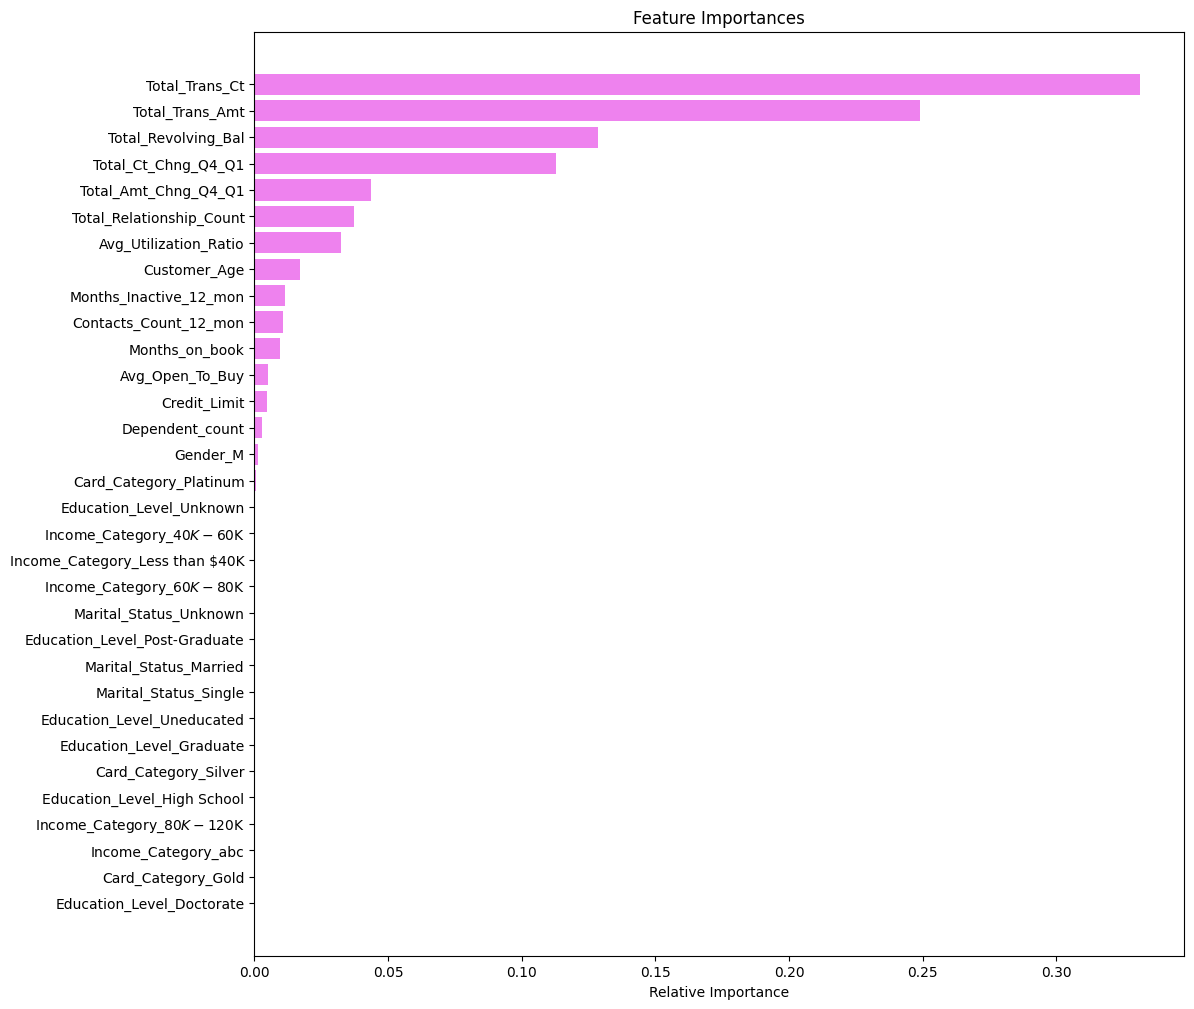

In [81]:
feature_names = X_train.columns
importances = tuned_gbm.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Business Insights and Conclusions

***

* Based on our analysis, the total transactions, amount of transactions, revolving balance are the main factors for the customers to renounce using credit card services.
* The bank might be charging more interests for their customers when the revolving balnce is high which makes them attrite.
* When you look at the EDA , the lower income people(Less than $40K) are the more to attrite which indicates that they couldnt afford paying their balance with huge interests with their very low income.
* If the bank looks at their demographics information ( age, income, salary) etc and dont charge penalties or interest they more likely help their clients not to churn.
* This ends our conclusion on credit card users churn prediction.




